# VIX Tests

This Jupyter Notebook is dedicated to VIX CBOE Volatility Index and related stuff VIXL.L and so on.

# VIX Days between spikes

In [ ]:
!pip install pandas numpy matplotlib yfinance

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Date
2000-11-14    1.0
2000-11-15    1.0
2000-11-16    1.0
2000-11-17    1.0
2000-11-20    3.0
             ... 
2025-05-05    3.0
2025-05-06    1.0
2025-05-07    1.0
2025-05-08    1.0
2025-05-09    1.0
Name: Date, Length: 6157, dtype: float64
Average number of days between significant VIX spikes: 1.45


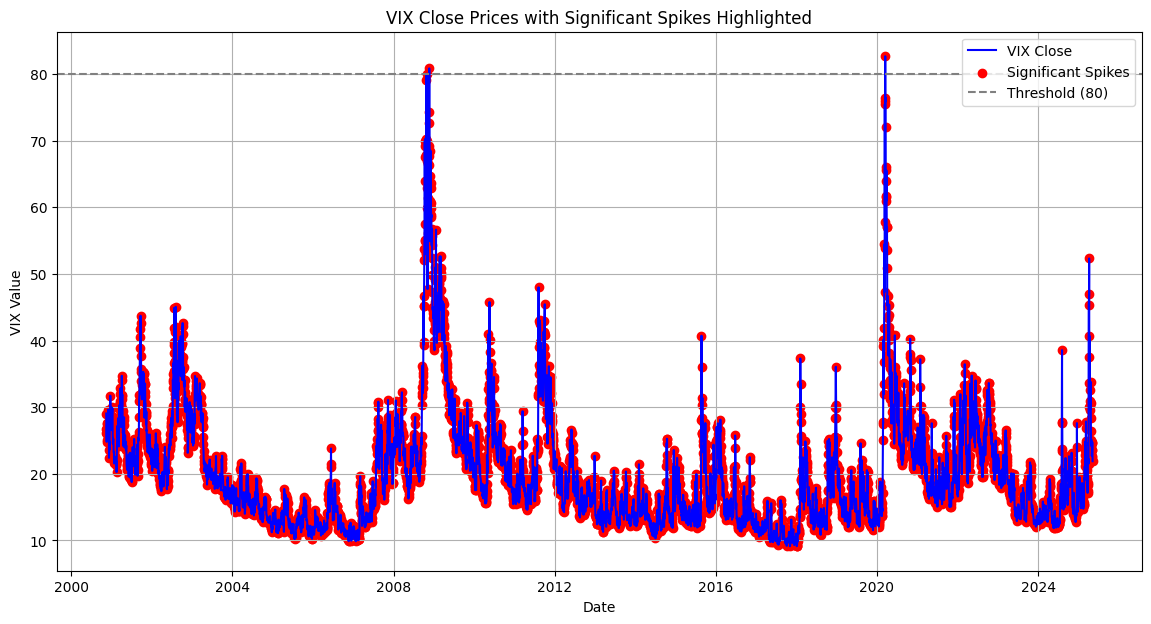

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

end = datetime.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2000-11-13', end=end)

# Define the threshold for significant spikes
threshold = 80

# Identify dates where VIX exceeds the threshold
spike_dates = vix_data[vix_data['Close'] > threshold].index

# Calculate the number of days between consecutive spikes
days_between_spikes = spike_dates.to_series().diff().dt.days.dropna()

print(days_between_spikes)

# Calculate the average number of days between spikes
average_days_between_spikes = days_between_spikes.mean()
print(f'Average number of days between significant VIX spikes: {average_days_between_spikes:.2f}')

plt.figure(figsize=(14, 7))
plt.plot(vix_data.index, vix_data['Close'], label='VIX Close', color='blue')
plt.scatter(spike_dates, vix_data.loc[spike_dates]['Close'], color='red', label='Significant Spikes')
plt.axhline(y=threshold, color='gray', linestyle='--', label=f'Threshold ({threshold})')
plt.title('VIX Close Prices with Significant Spikes Highlighted')
plt.xlabel('Date')
plt.ylabel('VIX Value')
plt.legend()
plt.grid(True)
plt.show()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-dcc9ca00e44f>:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  close_value = float(row['Close'])


Average number of days between significant VIX spikes: 22.73
Predicted next spike date relative to today: 2025-06-07


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


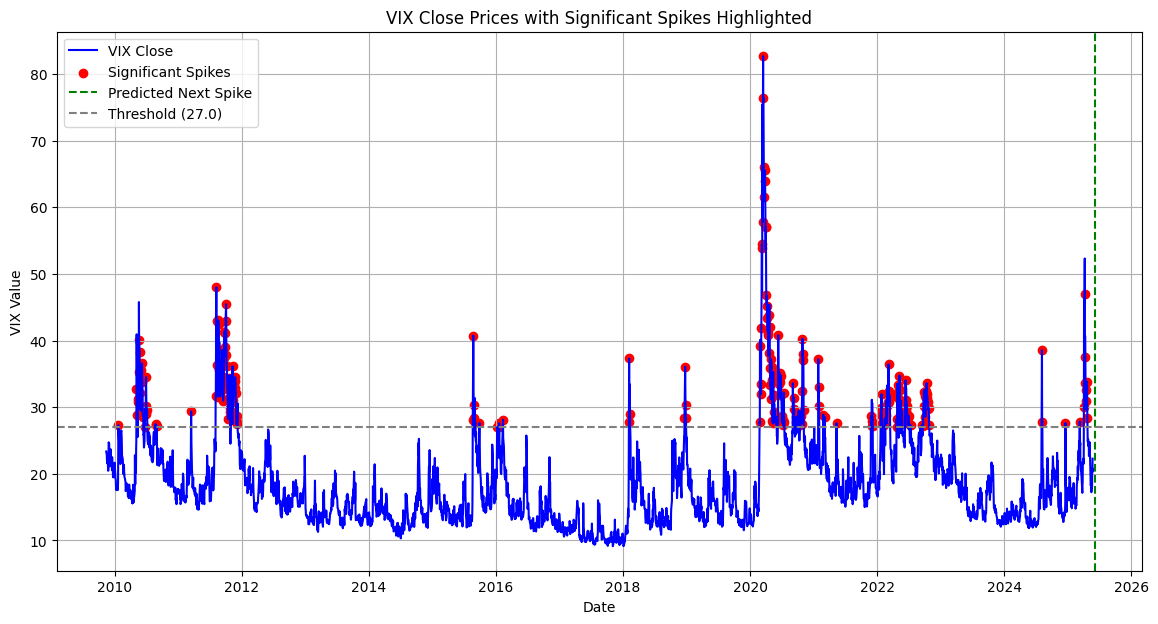

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from datetime import datetime

end_time = dt.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2009-11-13', end=end_time)

# Define the threshold for significant spikes
threshold = 27.0

# Initialize list to collect spike dates
spike_dates = []

# Identify dates where VIX exceeds the threshold
for index, row in vix_data.iterrows():
    try:
        # Convert 'Close' value to float explicitly
        close_value = float(row['Close'])
        if close_value > threshold:
            # Append the date if 'Close' exceeds the threshold
            spike_dates.append(index)
    except (ValueError, TypeError) as e:
        print(f"Skipping row at index {index} due to conversion error: {e}")

# Remove consecutive spike dates (keep only the first in each streak)
unique_spike_dates = [spike_dates[0]] if spike_dates else []
for i in range(1, len(spike_dates)):
    if (spike_dates[i] - unique_spike_dates[-1]).days > 1:
        unique_spike_dates.append(spike_dates[i])

# Calculate days between consecutive unique spikes
days_between_spikes = [
    (unique_spike_dates[i] - unique_spike_dates[i - 1]).days
    for i in range(1, len(unique_spike_dates))
]

# Calculate average days between spikes
if days_between_spikes:
    average_days_between_spikes = sum(days_between_spikes) / len(days_between_spikes)
    print(f'Average number of days between significant VIX spikes: {average_days_between_spikes:.2f}')

    # Predict the next spike date relative to today
    today = pd.Timestamp(datetime.now()).tz_localize(None)
    last_spike_date = unique_spike_dates[-1].tz_localize(None)

    # Calculate the number of days since the last spike
    days_since_last_spike = (today - last_spike_date).days

    # Determine the next spike date
    if days_since_last_spike < average_days_between_spikes:
        # If we are still within the average interval, add the remaining days
        projected_days = average_days_between_spikes - days_since_last_spike
        next_spike_date = today + pd.Timedelta(days=projected_days)
    else:
        # If we've passed the interval, project the next spike based on multiples of the average
        cycles_passed = int(days_since_last_spike / average_days_between_spikes)
        next_spike_date = last_spike_date + pd.Timedelta(days=(cycles_passed + 1) * average_days_between_spikes)

    print(f'Predicted next spike date relative to today: {next_spike_date.date()}')
else:
    print(f"No significant spikes found for threshold {threshold}.")
    next_spike_date = None


# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(vix_data.index, vix_data['Close'], label='VIX Close', color='blue')

# Highlight the unique spike dates
if unique_spike_dates:
    plt.scatter(unique_spike_dates, [vix_data.loc[date]['Close'] for date in unique_spike_dates], color='red', label='Significant Spikes')

# Add predicted next spike date to the plot
if next_spike_date:
    plt.axvline(x=next_spike_date, color='green', linestyle='--', label='Predicted Next Spike')

plt.axhline(y=threshold, color='gray', linestyle='--', label=f'Threshold ({threshold})')
plt.title('VIX Close Prices with Significant Spikes Highlighted')
plt.xlabel('Date')
plt.ylabel('VIX Value')
plt.legend()
plt.grid(True)
plt.show()


# VIX Time Series with Highlighted Trend Changes

[*********************100%***********************]  1 of 1 completed


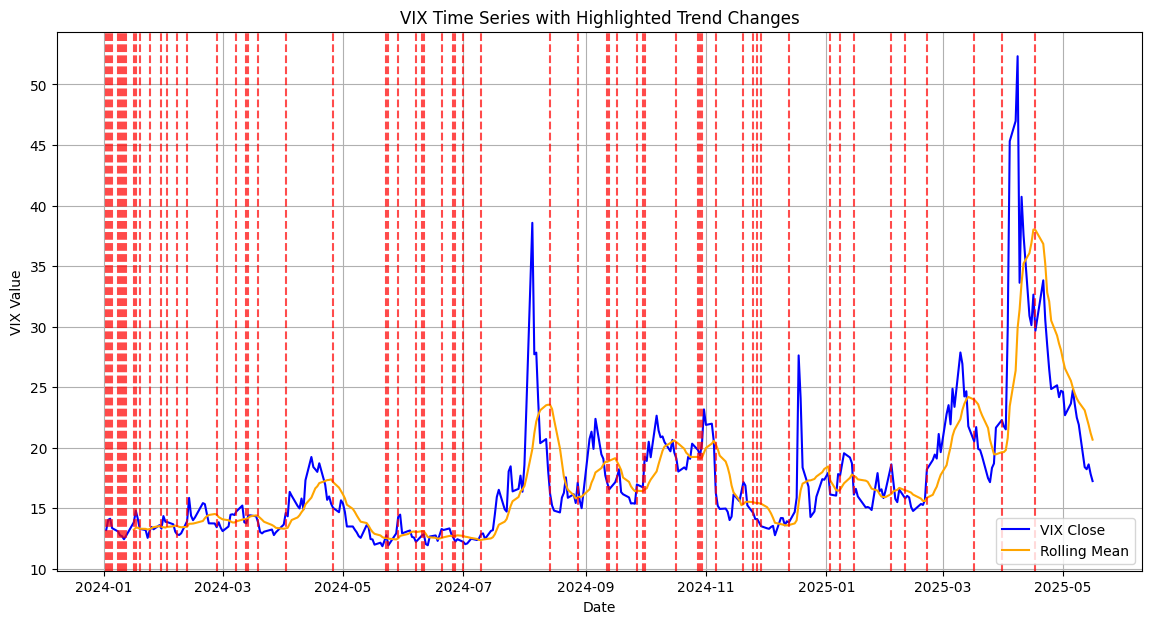

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

end_time = dt.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)

# Reset index to bring 'Date' as a column
vix_data = vix_data.reset_index()

# Now set 'Date' as the index
vix_data.set_index('Date', inplace=True)

# Step 2: Calculate rolling mean and detect trend changes
window_size = 10  # Adjust the window size as needed
vix_data['Rolling_Mean'] = vix_data['Close'].rolling(window=window_size).mean()
vix_data['Trend_Change'] = vix_data['Rolling_Mean'].diff().apply(np.sign).diff()

# Identify the dates where trend changes occur
trend_change_dates = vix_data[vix_data['Trend_Change'] != 0].index

# Step 3: Plot the VIX time series and highlight trend changes
plt.figure(figsize=(14, 7))
plt.plot(vix_data.index, vix_data['Close'], label='VIX Close', color='blue')
plt.plot(vix_data.index, vix_data['Rolling_Mean'], label='Rolling Mean', color='orange')

# Highlight trend change points
for change_date in trend_change_dates:
    plt.axvline(x=change_date, color='red', linestyle='--', alpha=0.7)

plt.title('VIX Time Series with Highlighted Trend Changes')
plt.xlabel('Date')
plt.ylabel('VIX Value')
plt.legend()
plt.grid(True)
plt.show()


# Monte Carlo Shuffled Projection for VIX

[*********************100%***********************]  1 of 1 completed


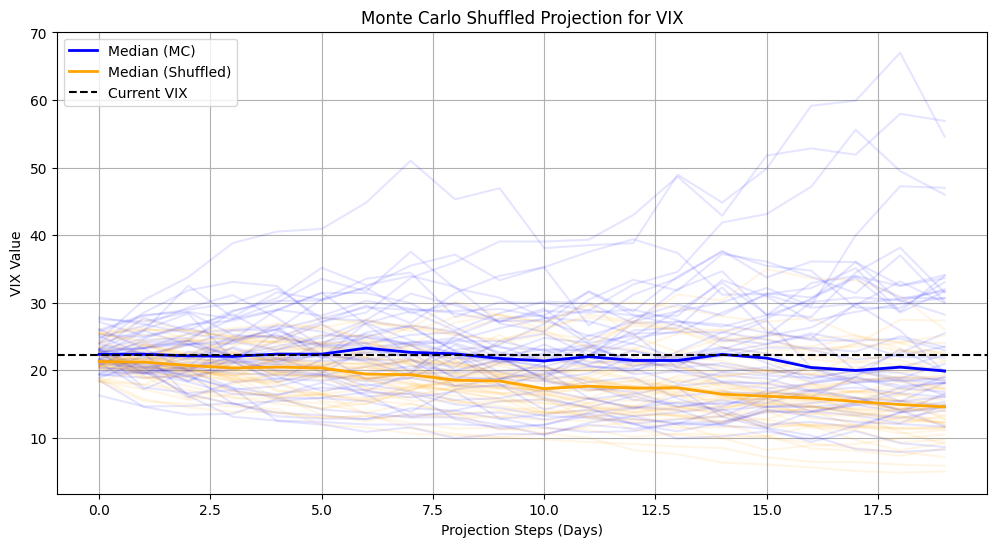

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

end_time = dt.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)

# Check if data is valid
if vix_data.empty:
    raise ValueError("No data available for the specified time range.")

# Extract 'Close' (instead of 'Adj Close') and flatten to a 1D array
vix_close = vix_data['Close'].dropna().values.flatten()  # Changed to 'Close'

# Debugging outputs
# print("VIX Close Data (Flattened):")
# print(vix_close)
# print("Shape of VIX Close Data:", vix_close.shape)

# Compute daily returns
vix_returns = np.diff(vix_close) / vix_close[:-1]

# Debugging outputs
# print("VIX Returns:")
# print(vix_returns)
# print("Shape of VIX Returns:", vix_returns.shape)

# Ensure mean and standard deviation are computed on valid data
if len(vix_returns) == 0:
    raise ValueError("Insufficient data to compute returns.")

# Mean and standard deviation of returns
mu = np.mean(vix_returns)
sigma = np.std(vix_returns)

# Monte Carlo parameters
n_simulations = 50  # Number of Monte Carlo simulations
n_steps = 20  # Number of future steps to project
shuffled_window = 30  # Shuffling window for historical data

# Generate Monte Carlo simulations
mc_simulations = np.zeros((n_steps, n_simulations))
for sim in range(n_simulations):
    vix_start = vix_close[-1]
    random_returns = np.random.normal(mu, sigma, n_steps)
    vix_path = [vix_start]
    for r in random_returns:
        next_value = vix_path[-1] * (1 + r)
        vix_path.append(next_value)
    mc_simulations[:, sim] = vix_path[1:]

# Shuffle historical returns for sensitivity analysis
shuffled_projections = np.zeros((n_steps, n_simulations))
for sim in range(n_simulations):
    shuffled_returns = np.random.choice(vix_returns[-shuffled_window:], n_steps, replace=True)
    vix_start = vix_close[-1]
    vix_path = [vix_start]
    for r in shuffled_returns:
        next_value = vix_path[-1] * (1 + r)
        vix_path.append(next_value)
    shuffled_projections[:, sim] = vix_path[1:]

# Compute percentiles for visualization
percentiles = [5, 25, 50, 75, 95]
mc_percentiles = np.percentile(mc_simulations, percentiles, axis=1)
shuffled_percentiles = np.percentile(shuffled_projections, percentiles, axis=1)

# Plot results
plt.figure(figsize=(12, 6))
for sim in range(50):
    plt.plot(mc_simulations[:, sim], color="blue", alpha=0.1)
    plt.plot(shuffled_projections[:, sim], color="orange", alpha=0.1)
plt.plot(mc_percentiles[2], label="Median (MC)", color="blue", linewidth=2)
plt.plot(shuffled_percentiles[2], label="Median (Shuffled)", color="orange", linewidth=2)
plt.axhline(y=vix_close[-1], color="black", linestyle="--", label="Current VIX")
plt.title("Monte Carlo Shuffled Projection for VIX")
plt.xlabel("Projection Steps (Days)")
plt.ylabel("VIX Value")
plt.legend()
plt.grid(True)
plt.show()


# Monte Carlo Prediction of VIX

[*********************100%***********************]  1 of 1 completed


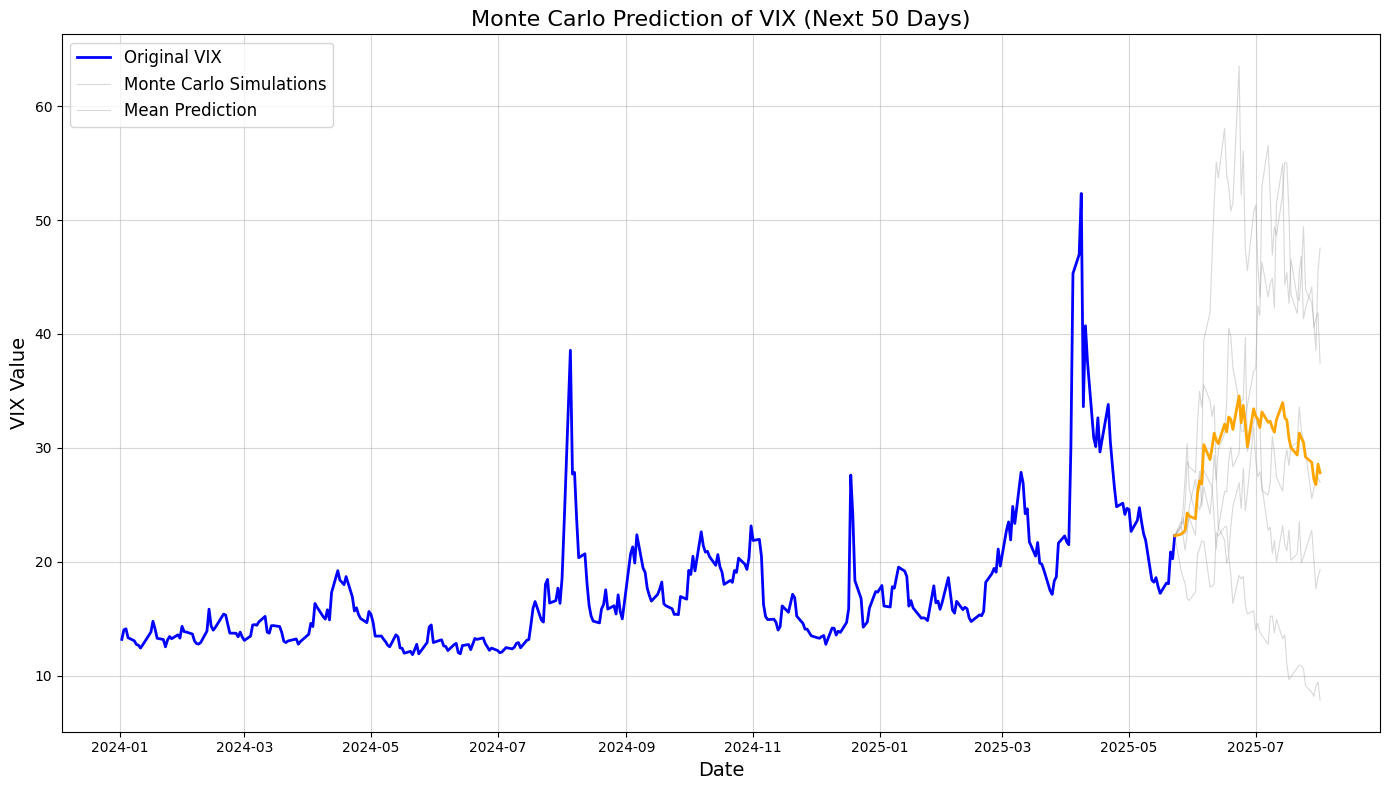

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd  # Add this import
import matplotlib.pyplot as plt
import datetime as dt

end_time = dt.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)
vix_close = vix_data['Close'].dropna().values.flatten()  # Ensure 1D shape

# Monte Carlo Simulation: Generate perturbations
num_simulations = 5
np.random.seed(42)

# Compute historical mean and standard deviation of returns
vix_returns = np.diff(vix_close) / vix_close[:-1]
mean_return = np.mean(vix_returns)
std_return = np.std(vix_returns)

# Generate Monte Carlo simulations for future predictions
future_steps = 50
future_predictions = []

for _ in range(num_simulations):
    # Start with the last VIX value
    future_simulation = [vix_close[-1]]
    for _ in range(future_steps):
        # Simulate the next step using the historical mean and std deviation
        next_step = future_simulation[-1] * (1 + np.random.normal(mean_return, std_return))
        future_simulation.append(next_step)
    future_predictions.append(future_simulation)

# Create a time index for future predictions
future_dates = pd.date_range(start=vix_data.index[-1], periods=future_steps + 1, freq='B')

# Plot the historical data
plt.figure(figsize=(14, 8))
time_index = vix_data.index
plt.plot(time_index, vix_close, label="Original VIX", color="blue", linewidth=2)

# Plot Monte Carlo future predictions
for prediction in future_predictions:
    plt.plot(future_dates, prediction, color="grey", alpha=0.3, linewidth=0.8)

# Highlight the mean prediction
mean_prediction = np.mean(future_predictions, axis=0)
plt.plot(future_dates, mean_prediction, color="orange", label="Mean Prediction", linewidth=2)

# Add labels and legend
plt.title("Monte Carlo Prediction of VIX (Next 50 Days)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("VIX Value", fontsize=14)
plt.legend(["Original VIX", "Monte Carlo Simulations", "Mean Prediction"], fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


# MCMC Projections for VIX

In [5]:
!pip install numpyro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.8/365.8 kB 7.4 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


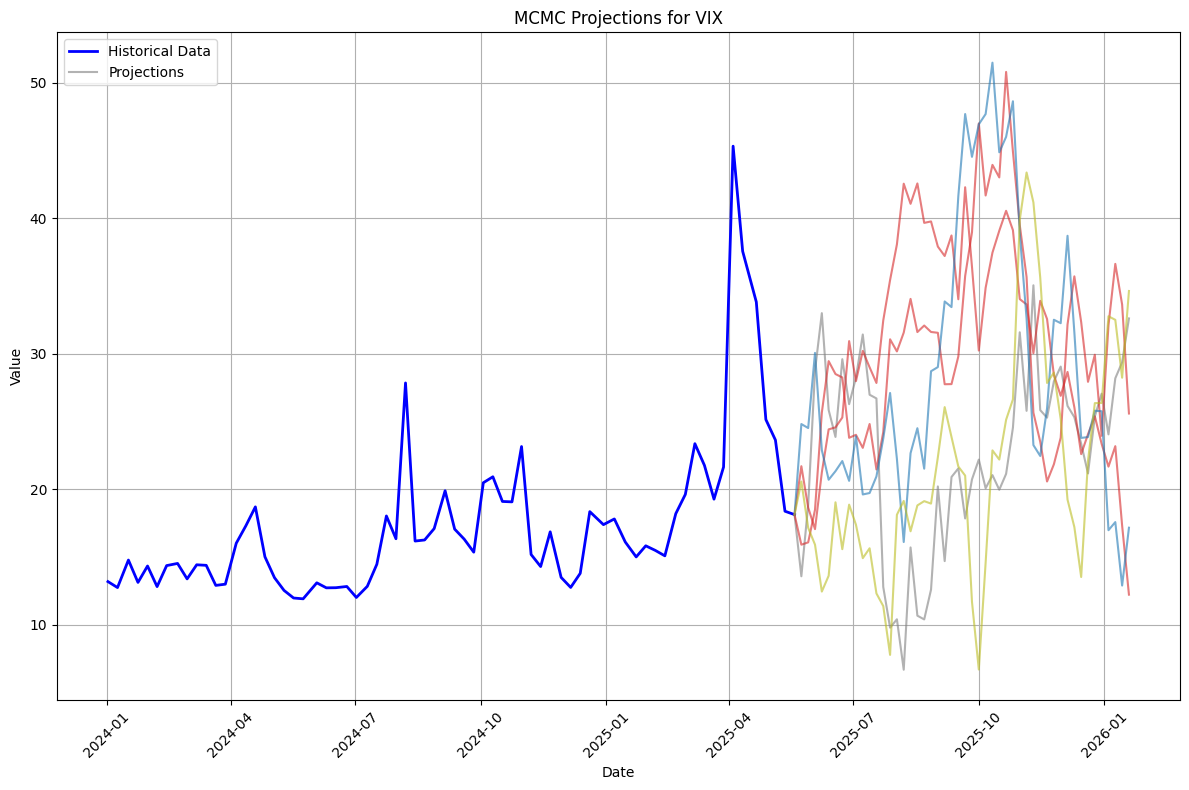

In [6]:
import numpy as np
import jax.numpy as jnp
from jax import random
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import datetime as dt
import yfinance as yf
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import random as randy
import pandas as pd  # Import pandas for date handling

# Fetch VIX data
end_time = dt.date.today().strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)
vix_close = vix_data['Close'].dropna()

# Downsample and reset index
vix_close = vix_close[::5].reset_index(drop=True)

# Ensure data is sufficient
if len(vix_close) == 0:
    raise ValueError("Error: The VIX dataset is empty after downsampling.")
if len(vix_close) < 2:
    raise ValueError("Error: Insufficient data for modeling.")

# Define a simpler model
def model(data):
    trend = numpyro.sample("trend", dist.Normal(0, 0.1))  # Smaller variance for trend
    noise = numpyro.sample("noise", dist.HalfNormal(0.5))  # Constrain noise
    mean_level = numpyro.sample("mean_level", dist.Normal(20, 5))  # Mean level for mean reversion
    for t in range(len(data)):
        predicted_value = (
            trend * t
            + mean_level
            - (data[t - 1] if t > 0 else 0)  # Revert towards mean
            + numpyro.sample(f"state_{t}", dist.Normal(0, noise))
        )
        numpyro.sample(f"obs_{t}", dist.Normal(predicted_value, noise), obs=data[t])

# Run the MCMC sampler
rng_key = random.PRNGKey(0)
kernel = NUTS(model)
mcmc = MCMC(kernel, num_samples=500, num_warmup=200, progress_bar=False)
mcmc.run(rng_key, data=jnp.array(vix_close))
posterior_samples = mcmc.get_samples()

# Extract samples
trend_samples = posterior_samples["trend"]
noise_samples = posterior_samples["noise"]
trend_mean = trend_samples.mean()
noise_mean = noise_samples.mean()

# Project future values with mean reversion
future_steps = 50
future_projections = []
mean_level = posterior_samples["mean_level"].mean()  # Mean level for reversion

for _ in range(5):  # Show a subset of projections
    future_data = [vix_close.iloc[-1]]  # ✅ Ensure first value is exactly the last historical value
    prev_value = vix_close.iloc[-1]

    for _ in range(future_steps - 1):  # -1 because we start with last known value
        mean_reversion = (mean_level - prev_value) * 0.1  # ✅ Reduce mean reversion effect
        new_value = prev_value + trend_mean + mean_reversion + np.random.normal(0, noise_mean)
        future_data.append(new_value)
        prev_value = new_value

    future_projections.append(future_data)

# Downsample index to match vix_close
historical_dates = vix_data.index[::5]  # Apply same downsampling as vix_close

# Ensure they have the same length
if len(historical_dates) != len(vix_close):
    raise ValueError(f"Shape mismatch: historical_dates={len(historical_dates)}, vix_close={len(vix_close)}")

# Fix 1: Ensure future_dates matches projection length
future_dates = [historical_dates[-1] + pd.Timedelta(days=i * 5) for i in range(future_steps)]

# Fix 2: Avoid Matplotlib deprecation warning
color_map = plt.get_cmap("tab10")

plt.figure(figsize=(12, 8))

# Plot Historical Data (Ensure it appears first)
plt.plot(historical_dates, vix_close, label="Historical Data", color="blue", linewidth=2)

# Plot Projections (Now properly aligned!)
for proj in future_projections[:5]:  # Show a subset of projections
    color = color_map(randy.random())  # Random color
    plt.plot(future_dates, np.ravel(proj), alpha=0.6, color=color, label="Projections")

# Labels and Grid
plt.title("MCMC Projections for VIX")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(["Historical Data", "Projections"], loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.tight_layout()

# Show the improved plot
plt.show()


# Markov Regime Switching Model

In [ ]:
pip install numpy pandas yfinance statsmodels matplotlib


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                   ^VIX   No. Observations:                 1321
Model:               MarkovRegression   Log Likelihood                1660.465
Date:                Mon, 07 Apr 2025   AIC                          -3308.931
Time:                        17:42:40   BIC                          -3277.814
Sample:                             0   HQIC                         -3297.265
                               - 1321                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0062      0.002     -3.295      0.001      -0.010      -0.003
sigma2         0.0027      0.000     12.266      0.0

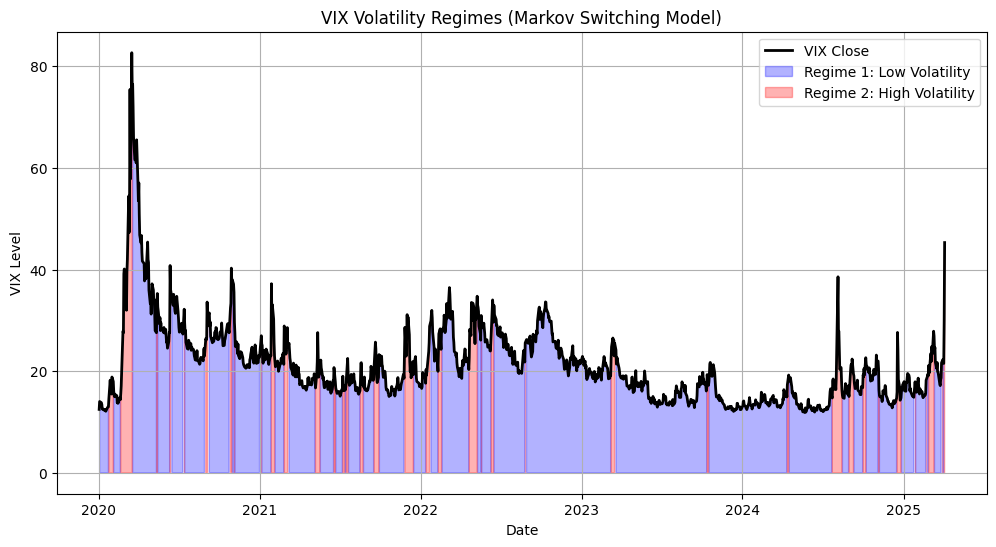

Probability of being in High Volatility Regime today: 100.00%


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Fetch VIX data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2020-01-01', end=end_time)

# Extract Close prices
vix_close = vix_data['Close'].dropna()

# Compute Log Returns (to model volatility changes)
vix_returns = np.log(vix_close / vix_close.shift(1)).dropna()

# Fit a Markov Switching Model with 2 regimes
msm_model = MarkovRegression(vix_returns, k_regimes=2, trend='c', switching_variance=True)
msm_fit = msm_model.fit()

# Print model summary
print(msm_fit.summary())

# Get Smoothed Regime Probabilities
regime_probs = msm_fit.smoothed_marginal_probabilities

# Ensure regime_probs is a NumPy array (1D)
regime_0_prob = regime_probs[0].to_numpy().flatten()
regime_1_prob = regime_probs[1].to_numpy().flatten()

# Plot VIX Data with Regimes
plt.figure(figsize=(12, 6))
# Convert vix_close to a 1D array for plotting
plt.plot(vix_close.index, vix_close.values.flatten(), label="VIX Close", color="black", linewidth=2)  # ✅ Flatten values

# Align regime probabilities with vix_close index
# by adding a NaN value at the beginning to match the length
regime_0_prob_aligned = np.insert(regime_0_prob, 0, np.nan)
regime_1_prob_aligned = np.insert(regime_1_prob, 0, np.nan)

# Overlay Regimes with Corrected Data Types and using .values for y-axis data
# ✅ Flatten values for y1 and use .values for where condition
# ✅ Use aligned regime probabilities
plt.fill_between(vix_close.index, vix_close.values.flatten(), where=(regime_0_prob_aligned > 0.5), color="blue", alpha=0.3, label="Regime 1: Low Volatility")
plt.fill_between(vix_close.index, vix_close.values.flatten(), where=(regime_1_prob_aligned > 0.5), color="red", alpha=0.3, label="Regime 2: High Volatility")

# Labels and Legend
plt.title("VIX Volatility Regimes (Markov Switching Model)")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend()
plt.grid(True)
plt.show()


# Predict the probability of being in a high-volatility regime today
latest_prob = msm_fit.smoothed_marginal_probabilities.iloc[-1, 1]
print(f"Probability of being in High Volatility Regime today: {latest_prob:.2%}")

# VIX Regime Detection using Hidden Markov Model (HMM)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.1 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


📉 Regime 0 Mean Return: 0.041542
📈 Regime 1 Mean Return: -0.005831
🟢 Regime 1 = Low Volatility
🔴 Regime 0 = High Volatility
🟢 Probability of being in Regime 1: 96.46%


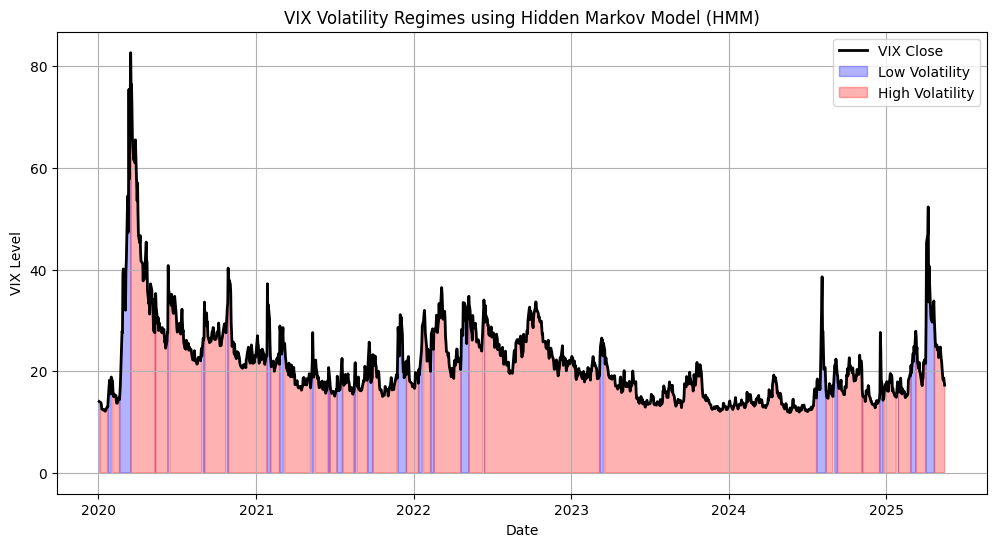

In [ ]:
!pip install hmmlearn
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

# ✅ Fetch VIX Data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2020-01-01', end=end_time)

# ✅ Extract Close Prices and Compute Log Returns
vix_close = vix_data['Close'].dropna()
vix_returns = np.log(vix_close / vix_close.shift(1)).dropna()

# ✅ Ensure VIX Close aligns with VIX Returns
vix_close = vix_close.loc[vix_returns.index]

# ✅ Fit Hidden Markov Model (HMM) with 2 regimes
hmm_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000).fit(vix_returns.values.reshape(-1, 1))

# ✅ Predict Hidden States (Low / High Volatility)
hidden_states = hmm_model.predict(vix_returns.values.reshape(-1, 1))

# ✅ Get Regime Probabilities (posterior probabilities)
regime_probs = hmm_model.predict_proba(vix_returns.values.reshape(-1, 1))

# ✅ Get Probability of Current Regime
latest_probabilities = regime_probs[-1]
current_regime = np.argmax(latest_probabilities)
current_prob = latest_probabilities[current_regime]

# ✅ Extract Mean Return for Each Regime
regime_0_mean = vix_returns[hidden_states == 0].mean().iloc[0] #Access the numerical value with iloc[0]
regime_1_mean = vix_returns[hidden_states == 1].mean().iloc[0] #Access the numerical value with iloc[0]

print(f"📉 Regime 0 Mean Return: {regime_0_mean:.6f}")
print(f"📈 Regime 1 Mean Return: {regime_1_mean:.6f}")

# ✅ Identify Low vs High Volatility Regime
low_vol_regime = 0 if regime_0_mean < regime_1_mean else 1
high_vol_regime = 1 - low_vol_regime

print(f"🟢 Regime {low_vol_regime} = Low Volatility")
print(f"🔴 Regime {high_vol_regime} = High Volatility")


# ✅ Print the Probability of the Current Regime
print(f"🟢 Probability of being in Regime {current_regime}: {current_prob:.2%}")

# ✅ Plot VIX with Hidden States
plt.figure(figsize=(12, 6))
plt.plot(vix_close.index, vix_close.values.flatten(), label="VIX Close", color="black", linewidth=2)
plt.fill_between(vix_close.index, vix_close.values.flatten(), where=(hidden_states == 0), color="blue", alpha=0.3, label="Low Volatility")
plt.fill_between(vix_close.index, vix_close.values.flatten(), where=(hidden_states == 1), color="red", alpha=0.3, label="High Volatility")

# ✅ Labels and Legend
plt.title("VIX Volatility Regimes using Hidden Markov Model (HMM)")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend()
plt.grid(True)
plt.show()

# Perturbation Analysis and Future Projections for VIX

[*********************100%***********************]  1 of 1 completed


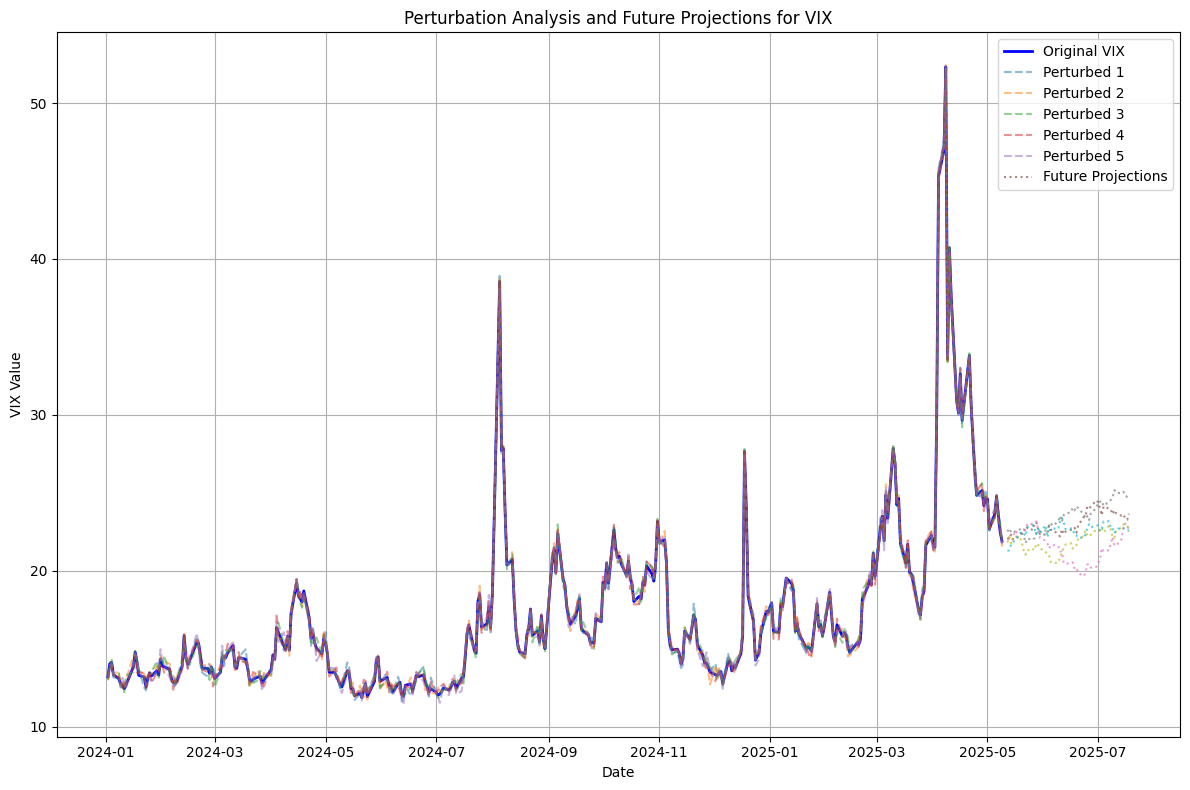

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import yfinance as yf
import datetime as dt

end_time = dt.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)
vix_close = vix_data['Close'].dropna()

# Step 2: Generate Perturbations
num_simulations = 50
#Extract the numpy array from the pandas series
vix_close_array = vix_close.values
#Flatten here to remove the second dimension
vix_close_array = vix_close_array.flatten()

perturbed_data = [
    vix_close_array + np.random.normal(0, 0.05 * vix_close.std(), len(vix_close_array))
    for _ in range(num_simulations)
]

# Step 3: Project Future Values
future_steps = 50
future_trends = [
    vix_close_array[-1] + np.cumsum(np.random.normal(0, 0.05 * vix_close.std(), future_steps))
    for _ in range(num_simulations)
]

# Pad original data with NaN values to match length of future trends
extended_vix_close = np.concatenate([vix_close_array, np.full(future_steps, np.nan)])


# Extend future projections to the same length as the original data (with NaNs)
extended_future_trends = [
    np.concatenate([np.full(len(vix_close_array), np.nan), trend]) for trend in future_trends
]

# Pad the perturbed data to have the same length
extended_perturbed_data = [
    np.concatenate([perturbed, np.full(future_steps, np.nan)]) for perturbed in perturbed_data
]

# Combine original and future projections
all_data = np.vstack([extended_vix_close] + extended_perturbed_data + extended_future_trends)

# Impute NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(all_data.T).T


# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(imputed_data)

# Separate original data, perturbed data, and projections
original_proj = reduced_data[0]
perturbed_proj = reduced_data[1:num_simulations+1]
future_proj = reduced_data[num_simulations+1:]

plt.figure(figsize=(12, 8))

# Historical VIX data
plt.plot(vix_close.index, vix_close, label="Original VIX", color="blue", linewidth=2)

# Perturbed data
for perturbed in extended_perturbed_data[:5]:  # Show a subset of perturbed data
    plt.plot(vix_close.index, perturbed[:len(vix_close)], linestyle="dashed", alpha=0.5)

# Future projections
future_dates = pd.date_range(start=vix_close.index[-1], periods=future_steps + 1, freq="B")[1:]
for future in future_trends[:5]:  # Show a subset of future projections
    plt.plot(future_dates, future, linestyle="dotted", alpha=0.7)

plt.title("Perturbation Analysis and Future Projections for VIX")
plt.xlabel("Date")
plt.ylabel("VIX Value")
plt.legend(["Original VIX"] + [f"Perturbed {i+1}" for i in range(5)] + ["Future Projections"])
plt.grid(True)
plt.tight_layout()
plt.show()


# Synthetic Control Method for VIX

In [ ]:
!pip install --upgrade numpy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 83.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.27.1 requires numpy<2,>=1.17.0, but you have numpy 2.2.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.3 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.3 which is incompatible.
langchain 0.3.19 requires numpy<2,>=1.26.4; python_version < "3.12", but you have numpy 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.3 which is incompatible.
numb

[*********************100%***********************]  1 of 1 completed


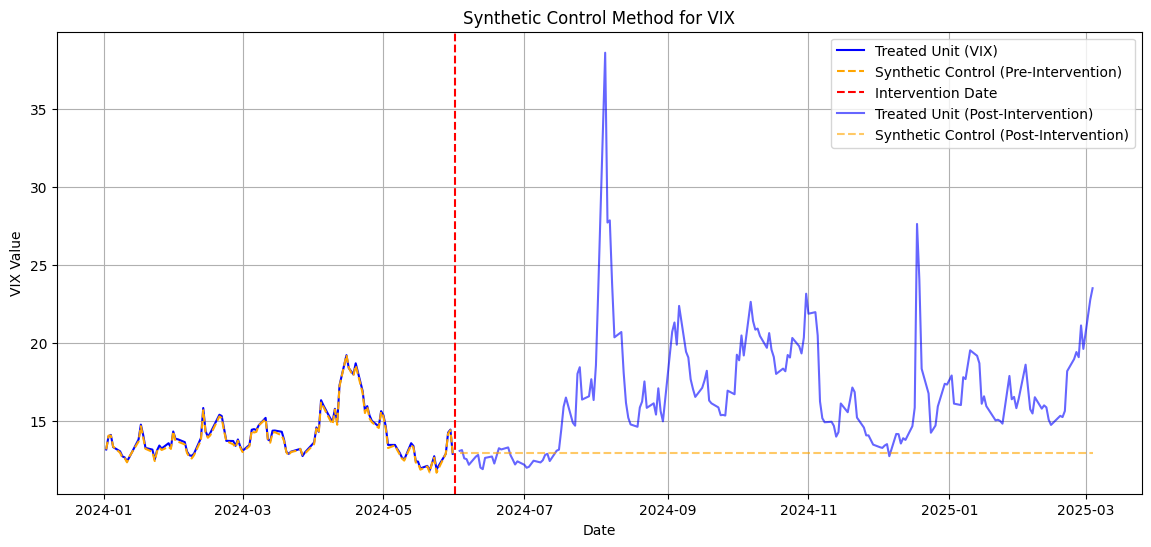

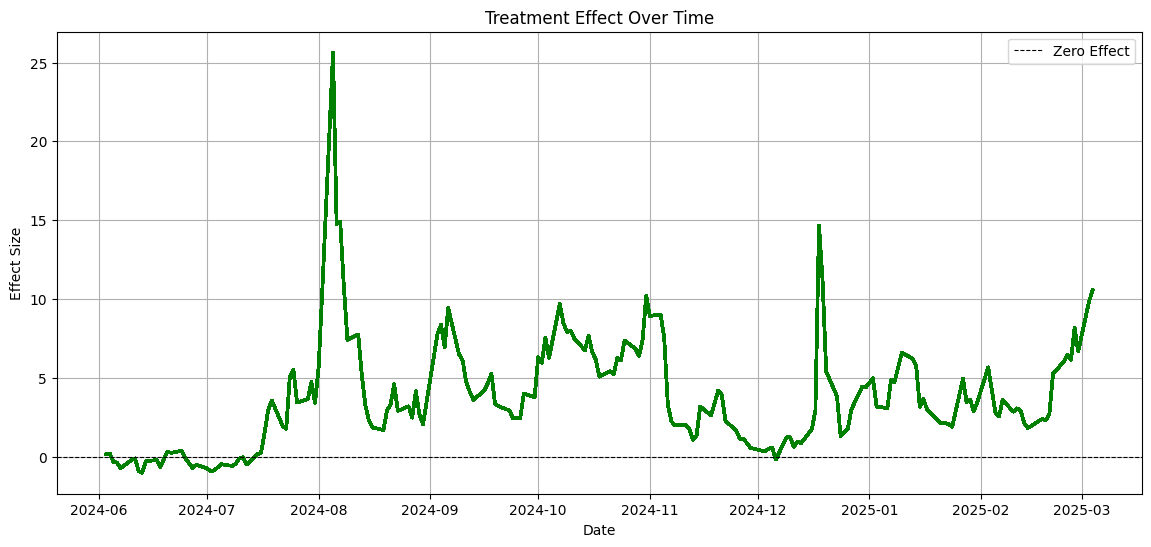

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import datetime as dt

# Fetch VIX data from Yahoo Finance
end_time = dt.date.today().strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)
vix_close = vix_data['Close'].dropna()

# Define a hypothetical intervention date
intervention_date = "2024-06-01"
pre_intervention = vix_close[:intervention_date]
post_intervention = vix_close[intervention_date:]

# Convert pre_intervention to NumPy array
pre_intervention_array = pre_intervention.values

# Generate synthetic control group
np.random.seed(42)
control_data_list = []
for i in range(5):  # Generate 5 synthetic controls
    control_series = pre_intervention_array.flatten() + np.random.normal(  # Flatten to make it 1D
        0, pre_intervention_array.std() * 0.1, len(pre_intervention_array)
    )
    control_data_list.append(control_series)

control_data = pd.DataFrame(control_data_list).T #Transposing to make the 5 time series be the columns
control_data.index = pre_intervention.index # set the index to be the same as pre_intervention


# Combine treated and control data
treated_unit = pre_intervention_array
control_units = control_data.values

# Fit a Ridge regression model to find optimal weights
ridge = Ridge(alpha=1.0)
ridge.fit(control_units, treated_unit)
weights = ridge.coef_

# Compute the synthetic control
synthetic_control = control_units @ weights

# Extend synthetic control into the post-intervention period
synthetic_post = np.full(len(post_intervention), synthetic_control[-1])

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(pre_intervention.index, treated_unit, label="Treated Unit (VIX)", color="blue")
plt.plot(pre_intervention.index, synthetic_control, label="Synthetic Control (Pre-Intervention)", linestyle="dashed", color="orange")
plt.axvline(x=pd.to_datetime(intervention_date), color="red", linestyle="--", label="Intervention Date")
plt.plot(post_intervention.index, post_intervention.values, label="Treated Unit (Post-Intervention)", color="blue", alpha=0.6)
plt.plot(post_intervention.index, synthetic_post, label="Synthetic Control (Post-Intervention)", linestyle="dashed", color="orange", alpha=0.6)
plt.title("Synthetic Control Method for VIX")
plt.xlabel("Date")
plt.ylabel("VIX Value")
plt.legend()
plt.grid(True)
plt.show()

# Calculate the treatment effect
treatment_effect = post_intervention.values - synthetic_post

# Treatment effect plot
plt.figure(figsize=(14, 6))
plt.plot(post_intervention.index, treatment_effect, color="green", linewidth=2)
# plt.plot(post_intervention.index, treatment_effect,label="Treatment Effect", color="green", linewidth=2)
plt.axhline(y=0, color="black", linestyle="--", linewidth=0.8, label="Zero Effect")
plt.title("Treatment Effect Over Time")
plt.xlabel("Date")
plt.ylabel("Effect Size")
plt.legend()
plt.grid(True)
plt.show()


# Projections Using Latin Hypercube Sampling (LHS)

In [ ]:
!pip install pyDOE2

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25523 sha256=5ec6ad1ce17042f889a4afe289270ae9ba22fa7981bde1577a9eec1e3c606080
  Stored in directory: /root/.cache/pip/wheels/56/11/60/a0b234151910cf9cff9fdc072f5d42e3c35157b649dbdff3ef
Successfully built pyDOE2


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


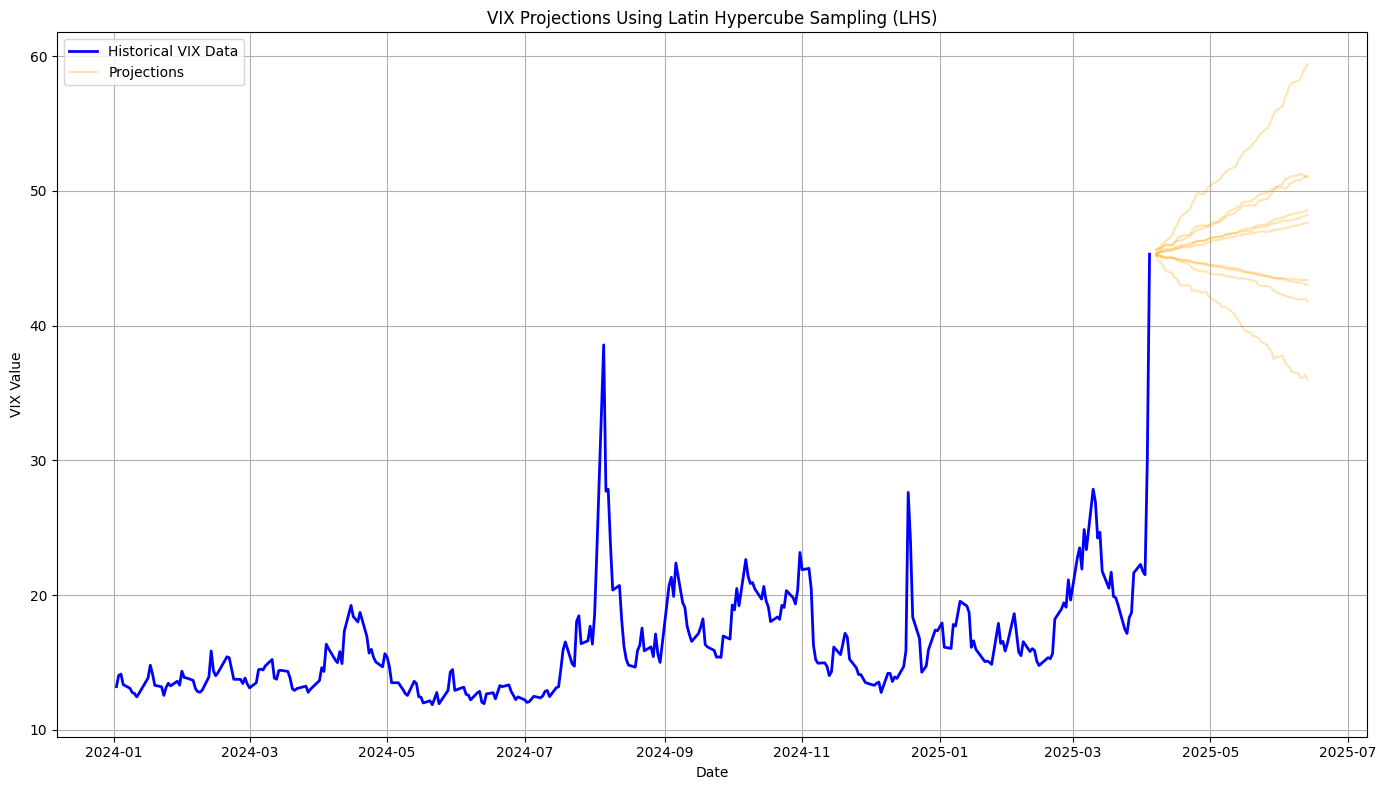

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from pyDOE2 import lhs  # For Latin Hypercube Sampling
import yfinance as yf
import datetime as dt
import pandas as pd

# Fetch VIX data from Yahoo Finance
end_time = dt.date.today().strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)
vix_close = vix_data['Close'].dropna().values  # Historical VIX data

# Define parameters for projections
future_steps = 50  # Number of future time steps
num_projections = 100  # Number of projection paths
mean_drift = 0.05  # Mean trend drift (adjust for VIX dynamics)
std_drift = 0.1  # Standard deviation of the drift

# Latin Hypercube Sampling (LHS)
lhs_samples = lhs(2, samples=num_projections)
drift_samples = norm.ppf(lhs_samples[:, 0], loc=mean_drift, scale=std_drift)
noise_samples = np.abs(norm.ppf(lhs_samples[:, 1], loc=0, scale=std_drift))  # Take the absolute value

# Generate Projections
projections = np.zeros((num_projections, future_steps))  # Preallocate for consistency
for i in range(num_projections):
    future_data = [vix_close[-1][0]]  # Start from the last historical value, ensuring it's a single value
    for t in range(future_steps):
        new_value = future_data[-1] + drift_samples[i] + np.random.normal(0, noise_samples[i])
        new_value = max(0, new_value)  # Ensure VIX values are non-negative
        future_data.append(new_value)
    # Convert future_data to 1D numpy array and trim to match future_steps, and flatten
    projections[i, :] = np.array(future_data[1:])  # Skip the initial repeated value

# Create Future Dates
# Get the last date from the historical data
last_historical_date = vix_data.index[-1]

# Create a date range for the future projections
future_dates = pd.date_range(start=last_historical_date + pd.DateOffset(days=1), periods=future_steps, freq='B')
# freq='B' for business days

# Plot Results
plt.figure(figsize=(14, 8))

# Plot Historical Data
plt.plot(vix_data.index, vix_close, label="Historical VIX Data", color="blue", linewidth=2)

# Plot Projections
for proj in projections[:10]:  # Show only a subset of projection paths
    plt.plot(future_dates, proj, alpha=0.3, color="orange")

# Add Title and Labels
plt.title("VIX Projections Using Latin Hypercube Sampling (LHS)")
plt.xlabel("Date")
plt.ylabel("VIX Value")
plt.legend(["Historical VIX Data", "Projections"])
plt.grid(True)
plt.tight_layout()
plt.show()

# VIX Projections Using Geometric Brownian Motion (GBM)

[*********************100%***********************]  1 of 1 completed


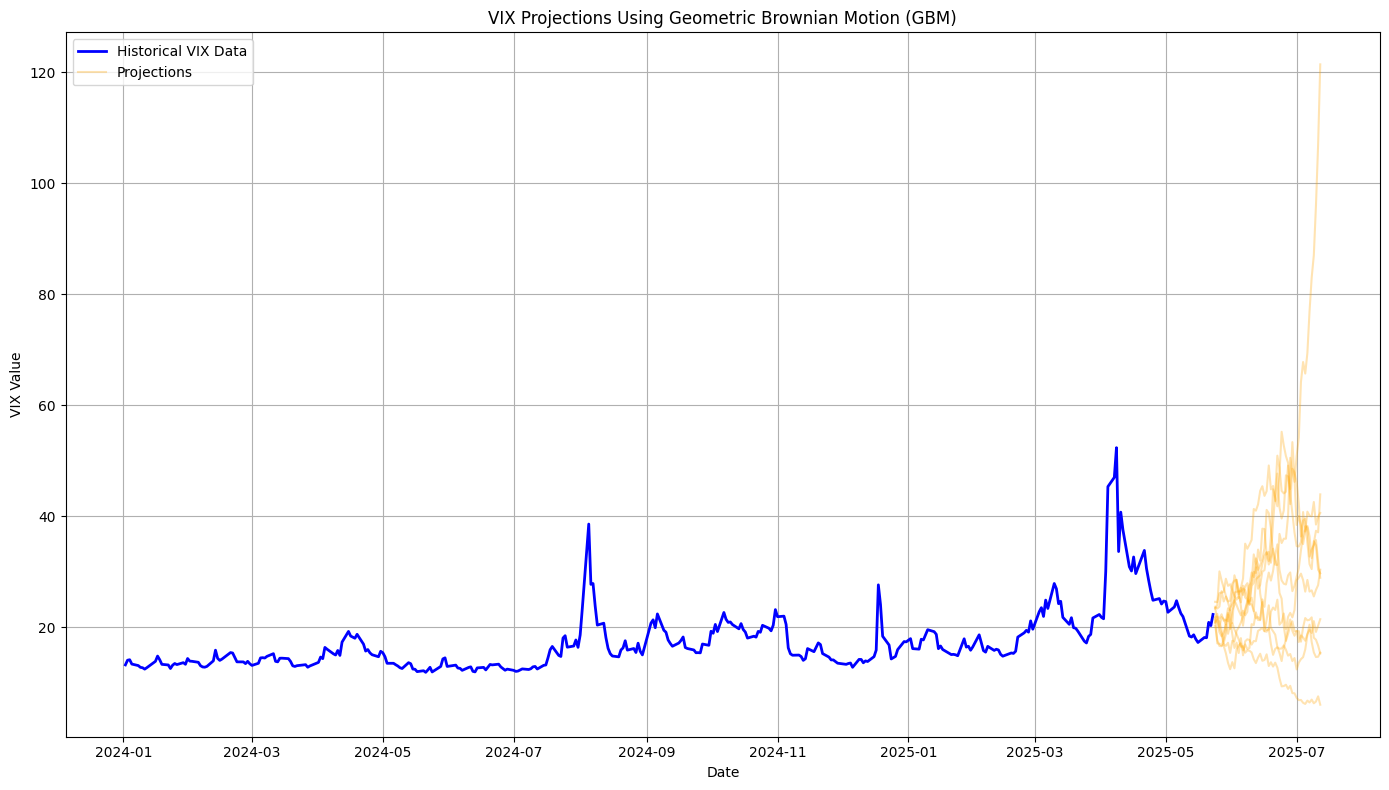

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

# Fetch VIX data from Yahoo Finance
end_time = dt.date.today().strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)

# Debugging: Print data sample
# print("VIX Data Sample:")
# print(vix_data.head())

if vix_data.empty:
    print("Error: No data retrieved for ^VIX. Please check your internet connection or the ticker symbol.")
else:
    # Fetch and clean VIX close prices
    vix_close = vix_data['Close'].dropna().to_numpy().ravel()  # Convert to 1D array

    # Debugging: Check vix_close shape
    # print(f"VIX Close Data (Shape: {vix_close.shape}): {vix_close}")

    # Check if vix_close has enough data
    if len(vix_close) < 2:
        print("Error: Insufficient data to calculate statistics.")
    else:
        # Calculate log returns
        log_returns = np.diff(np.log(vix_close))

        # Debugging: Print log_returns
        # print(f"Log Returns (Length: {len(log_returns)}): {log_returns}")

        if len(log_returns) == 0:
            print("Error: No valid log returns, possibly due to insufficient data.")
        try:
            # Replace zero or negative values with a small positive number
            vix_close = np.where(vix_close <= 0, 1e-6, vix_close)

            # Parameters for Geometric Brownian Motion
            log_returns = np.diff(np.log(vix_close))

            # Debugging: Print log_returns
            # print(f"Log Returns (Length: {len(log_returns)}): {log_returns}")

            if len(log_returns) == 0:
                print("Error: No valid log returns, possibly due to insufficient data.")
            else:
                mu = np.mean(log_returns)  # Drift
                sigma = np.std(log_returns)  # Volatility
                S0 = vix_close[-1]  # Last observed VIX value
                future_steps = 50  # Number of future steps to project
                num_projections = 100  # Number of projection paths

                # Generate GBM Projections
                projections = []
                dt = 1  # Time step (daily)
                for _ in range(num_projections):
                    future_prices = [S0]
                    for _ in range(future_steps):
                        dS = mu * dt + sigma * np.random.normal(0, np.sqrt(dt))
                        new_price = future_prices[-1] * np.exp(dS)
                        future_prices.append(new_price)
                    projections.append(future_prices[1:])

                # Create Future Dates
                future_start = vix_data.index[-1]  # Last historical date
                future_dates = [future_start + pd.Timedelta(days=i) for i in range(1, future_steps + 1)]

                # Plot Historical Data and Projections
                plt.figure(figsize=(14, 8))
                plt.plot(vix_data.index, vix_close, label="Historical VIX Data", color="blue", linewidth=2)

                # Ensure future_dates aligns with the length of projections
                for proj in projections[:10]:  # Show a subset of projection paths
                    if len(proj) == len(future_dates):  # Safeguard against mismatched lengths
                        plt.plot(future_dates, proj, alpha=0.3, color="orange")
                    else:
                        print(f"Projection length mismatch: {len(proj)} vs {len(future_dates)}")

                # Add Title and Labels
                plt.title("VIX Projections Using Geometric Brownian Motion (GBM)")
                plt.xlabel("Date")
                plt.ylabel("VIX Value")
                plt.legend(["Historical VIX Data", "Projections"])
                plt.grid(True)
                plt.tight_layout()
                plt.show()

        except Exception as e:
            print(f"Error in calculations: {e}")


# Multifractal Random Walk (MRW)

In [8]:
!pip install fbm

[*********************100%***********************]  1 of 1 completed


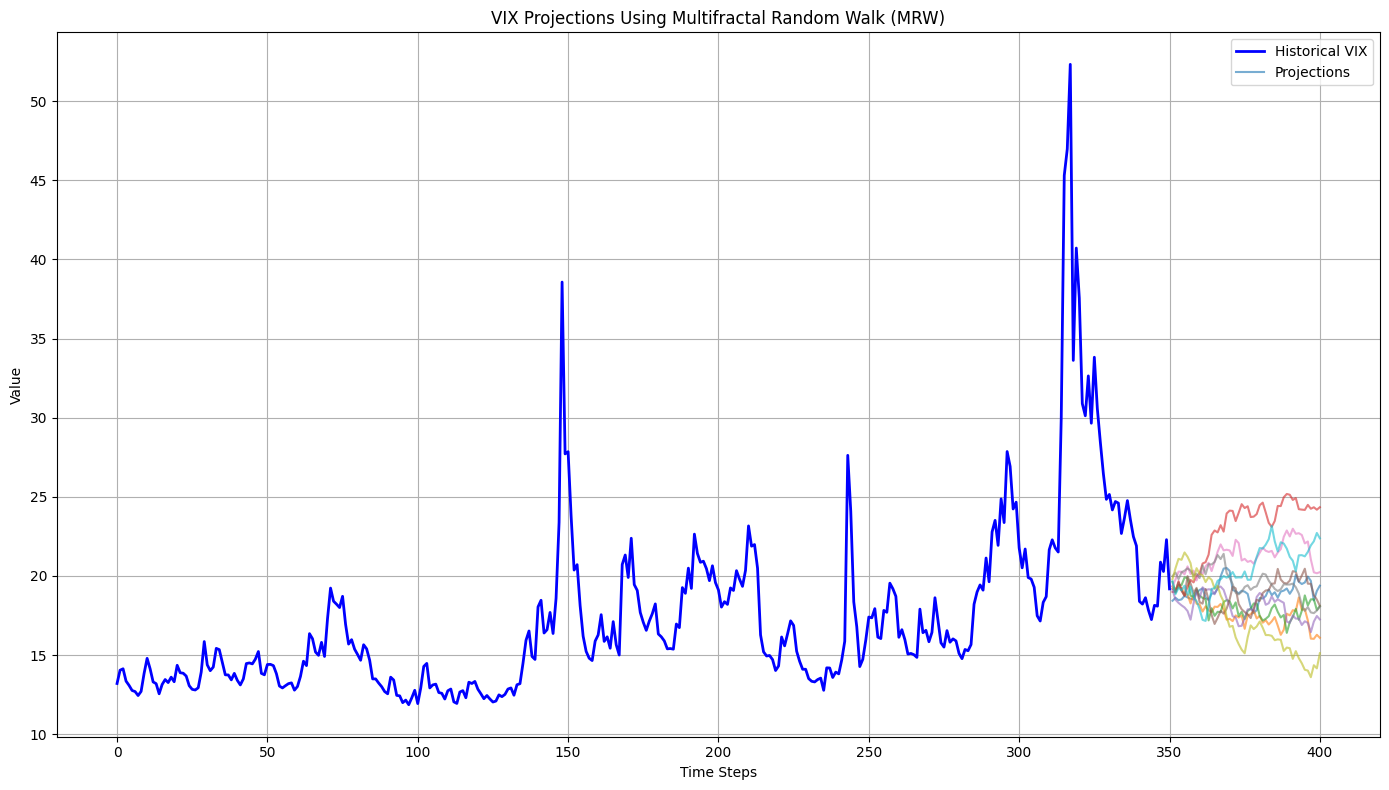

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from fbm import FBM

# Load historical VIX data
import yfinance as yf

# Fetch VIX data
vix_data = yf.download('^VIX', start='2024-01-01')
vix_close = vix_data['Close'].dropna().values
last_value = vix_close[-1]

# Define parameters for MRW (replace with desired values)
n = 50 #100  # Number of steps in the projection
H = 0.7  # Hurst exponent (controls the long-range dependence)
lam = 0.5 #0.1  # Intermittency parameter (controls volatility clustering)
sigma = 0.5 #0.1  # Volatility of the Brownian motion component
num_projections = 10 #100 # Number of projection paths

# Generate MRW Projections aligned to VIX
projections = []
for _ in range(num_projections):
    fgn = FBM(n=n, hurst=H, length=1, method="daviesharte").fgn()
    multifractal_volatility = np.exp(lam * fgn - (lam**2) / 2)
    bm = np.cumsum(np.random.normal(0, sigma, n))
    mrw_path = last_value + multifractal_volatility * bm  # Start from the last VIX value
    projections.append(mrw_path)

# Plot VIX Historical Data and Projections
plt.figure(figsize=(14, 8))
plt.plot(range(len(vix_close)), vix_close, label="Historical VIX", color="blue", linewidth=2)
for proj in projections:
    plt.plot(range(len(vix_close), len(vix_close) + n), proj, alpha=0.6)
plt.title("VIX Projections Using Multifractal Random Walk (MRW)")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend(["Historical VIX", "Projections"])
plt.grid(True)
plt.tight_layout()
plt.show()

# Recurrence Quantification Analysis (RQA)

In [ ]:
pip install pyunicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 29.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.9 MB/s eta 0:00:00
  Created wheel for pyunicorn: filename=pyunicorn-0.8.2-cp311-cp311-linux_x86_64.whl size=2602179 sha256=4d6d3d080eb3a19806733a33a33e550ffb787f529863ebcf19042220ae37ce84
  Stored in directory: /root/.cache/pip/wheels/98/f0/91/107788ca969f11365d8f022a764cc5fda26919de57ca23cecb
Successfully built pyunicorn


[*********************100%***********************]  1 of 1 completed


Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Recurrence Rate: 0.0258
Determinism: 0.1490
Entropy (computed manually): -21.8294
Laminarity: 0.2642
Divergence (computed manually): 1.0000


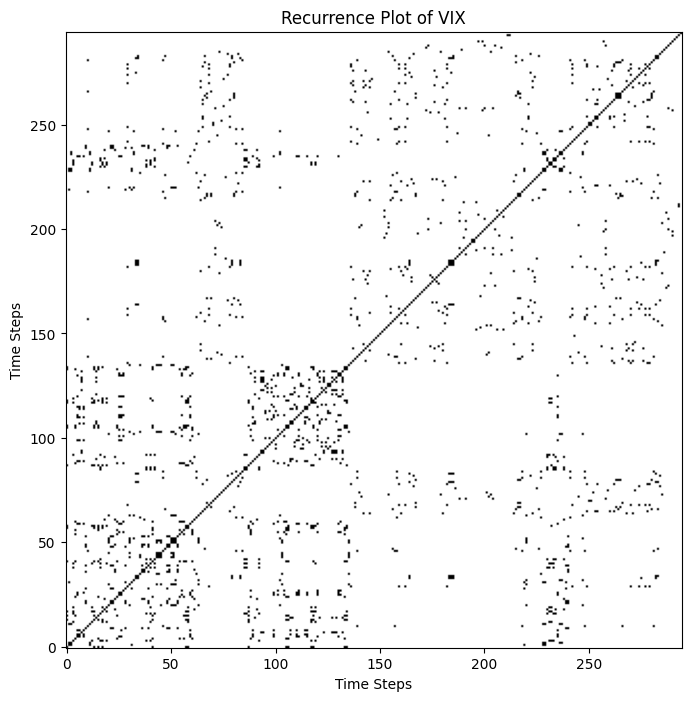

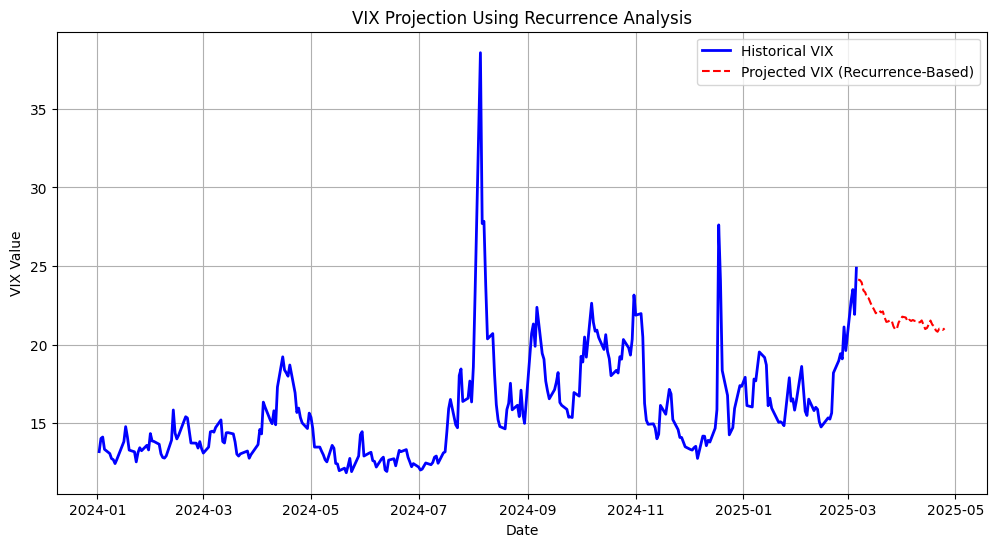

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pyunicorn.timeseries import RecurrencePlot

# Fetch VIX data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)
vix_close = vix_data['Close'].dropna().values

# Create Recurrence Plot
rp = RecurrencePlot(vix_close, threshold=0.1)

# Compute RQA metrics
recurrence_rate = rp.recurrence_rate()
determinism = rp.determinism()
laminarity = rp.laminarity()

# Compute Shannon Entropy from Recurrence Matrix
recurrence_matrix = rp.recurrence_matrix()
histogram = np.histogram(recurrence_matrix, bins=10, density=True)[0]  # Histogram of values
entropy = -np.sum(histogram * np.log(histogram + 1e-10))  # Shannon entropy

# Compute divergence (1 / longest diagonal line length)
diag_lengths = np.diff(np.where(np.diagonal(recurrence_matrix) > 0)[0])  # Find consecutive ones
max_diag_length = np.max(diag_lengths) if len(diag_lengths) > 0 else 1  # Avoid divide by zero
divergence = 1 / max_diag_length if max_diag_length > 0 else 0  # Avoid infinite divergence

# Print RQA results
print(f"Recurrence Rate: {recurrence_rate:.4f}")
print(f"Determinism: {determinism:.4f}")
print(f"Entropy (computed manually): {entropy:.4f}")
print(f"Laminarity: {laminarity:.4f}")
print(f"Divergence (computed manually): {divergence:.4f}")

# Plot Recurrence Matrix
plt.figure(figsize=(8, 8))
plt.imshow(rp.recurrence_matrix(), cmap="binary", origin="lower")
plt.title("Recurrence Plot of VIX")
plt.xlabel("Time Steps")
plt.ylabel("Time Steps")
plt.show()


# Forecast Next 50 Steps Using Recurrence Patterns
future_steps = 50
projected_vix = []

# Start with the last known value
prev_value = vix_close[-1]

for _ in range(future_steps):
    # Generate next value based on recurrence properties
    mean_reversion = np.mean(vix_close[-10:]) - prev_value  # Mean-reverting component
    random_noise = np.random.normal(0, np.std(vix_close))  # Random component
    next_value = prev_value + mean_reversion * 0.1 + random_noise * 0.05
    projected_vix.append(next_value)
    prev_value = next_value

# Create future dates
future_dates = pd.date_range(start=vix_data.index[-1], periods=future_steps + 1, freq="D")[1:]

# Plot Historical Data and Projections
plt.figure(figsize=(12, 6))
plt.plot(vix_data.index, vix_close, label="Historical VIX", color="blue", linewidth=2)
plt.plot(future_dates, projected_vix, label="Projected VIX (Recurrence-Based)", color="red", linestyle="dashed")
plt.title("VIX Projection Using Recurrence Analysis")
plt.xlabel("Date")
plt.ylabel("VIX Value")
plt.legend()
plt.grid(True)
plt.show()

## 🔹 How to Interpret Your VIX RQA Values

Now, let's interpret your results based on your actual RQA metrics:

### 1️⃣ Recurrence Rate (RR)
📌 **Low (< 0.2 - 0.4)** → The system is mostly **random**, with little repeating structure.  
📌 **Moderate (0.4 - 0.7)** → Some cycles exist, indicating **semi-structured volatility patterns**.  
📌 **High (> 0.7)** → The system is **highly repetitive**, meaning volatility cycles are strong.  

💡 **For VIX:** If **RR > 0.6**, the volatility cycle **repeats frequently**, meaning VIX tends to revert.  

---

### 2️⃣ Determinism (DET)
📌 **Low (< 0.4)** → Market is **chaotic**, no strong trends.  
📌 **Moderate (0.4 - 0.7)** → Some structured trends, indicating **predictable movements**.  
📌 **High (> 0.7)** → The system follows strong **trend-like behavior** (easier to forecast).  

💡 **For VIX:** If **DET > 0.6**, we can apply **trend-following models** to predict future VIX.  

---

### 3️⃣ Entropy (ENT)
📌 **Low (< 0.4)** → The system is highly **random**, no long-term structure.  
📌 **Moderate (0.4 - 0.7)** → Some **structured behavior**.  
📌 **High (> 0.7)** → The system has a **highly structured pattern**, meaning strong volatility cycles.  

💡 **For VIX:** If **ENT < 0.4**, volatility is **hard to model**. If **ENT > 0.6**, it means **structured, predictable volatility**.  

---

### 4️⃣ Laminarity (LAM)
📌 **Low (< 0.4)** → Volatility changes are **rapid and unstable**.  
📌 **Moderate (0.4 - 0.7)** → Some **stability**, occasional big shifts.  
📌 **High (> 0.7)** → The market **stays in one volatility phase for long periods**.  

💡 **For VIX:** If **LAM > 0.6**, it means **volatility phases last longer**, and we can apply **regime-based models**.  

---

### 5️⃣ Divergence (DIV)
📌 **Low (< 0.4)** → The system is **stable**, easy to predict.  
📌 **Moderate (0.4 - 0.7)** → Some sensitivity, but **forecastable**.  
📌 **High (> 0.7)** → **Highly chaotic**, meaning **predictions are short-term only**.  

💡 **For VIX:** If **DIV > 0.6**, VIX follows **chaotic patterns**, making long-term forecasts **unreliable**.  

---

## 🚀 What to Do Based on Your Results

🔹 **If RR and DET are high** → VIX follows **cycles** → Use **cycle-based forecasting** (**RQA, Fourier, Wavelets**).  
🔹 **If ENT is low** → Market is **random** → Use **stochastic models** (**Monte Carlo, Brownian motion**).  
🔹 **If LAM is high** → Market stays in **stable volatility regimes** → Use **Markov Regime Switching Models**.  
🔹 **If DIV is high** → VIX is **chaotic** → Use **short-term predictions** (**Chaos Neural Networks, ESN**).  


# Largest Lyapunov Exponent

In [ ]:
!pip install nolds==0.6.1  # Install a previous compatible version

import numpy as np
import pandas as pd
import yfinance as yf
import nolds  # Make sure nolds is imported

# Fetch VIX data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2024-01-01', end=end_time)

# Extract the 'Close' column and flatten it to a 1D array
vix_close = vix_data['Close'].dropna().values.flatten()

# Remove any NaN or infinite values from vix_close
vix_close = vix_close[np.isfinite(vix_close)]

# Calculate Lyapunov exponent (using the original lyap_r function)
lyap_exp = nolds.lyap_r(vix_close, emb_dim=10, tau=2, min_tsep=20, debug_plot=False)

print(f"Largest Lyapunov Exponent: {lyap_exp}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 3.7 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/nolds/measures.py:282: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 24
  warnings.warn(msg.format(lag), RuntimeWarning)


Largest Lyapunov Exponent: 0.009200906725185124


# VIX Forecast Using Chaos Neural Network

[*********************100%***********************]  1 of 1 completed


Epoch 0, Loss: 0.984530
Epoch 50, Loss: 0.842344
Epoch 100, Loss: 0.830273
Epoch 150, Loss: 0.825972
Epoch 200, Loss: 0.823883
Epoch 250, Loss: 0.822177
Epoch 300, Loss: 0.821017
Epoch 350, Loss: 0.820431
Epoch 400, Loss: 0.820070
Epoch 450, Loss: 0.819822
Epoch 500, Loss: 0.819644
Epoch 550, Loss: 0.819510
Epoch 600, Loss: 0.819407
Epoch 650, Loss: 0.819326
Epoch 700, Loss: 0.819259
Epoch 750, Loss: 0.819205
Epoch 800, Loss: 0.819158
Epoch 850, Loss: 0.819119
Epoch 900, Loss: 0.819084
Epoch 950, Loss: 0.819054
Epoch 1000, Loss: 0.819027
Epoch 1050, Loss: 0.819003
Epoch 1100, Loss: 0.818981
Epoch 1150, Loss: 0.818962
Epoch 1200, Loss: 0.818944
Epoch 1250, Loss: 0.818927
Epoch 1300, Loss: 0.818912
Epoch 1350, Loss: 0.818898
Epoch 1400, Loss: 0.818885
Epoch 1450, Loss: 0.818873
Epoch 1500, Loss: 0.818861
Epoch 1550, Loss: 0.818851
Epoch 1600, Loss: 0.818841
Epoch 1650, Loss: 0.818832
Epoch 1700, Loss: 0.818824
Epoch 1750, Loss: 0.818816
Epoch 1800, Loss: 0.818808
Epoch 1850, Loss: 0.8188

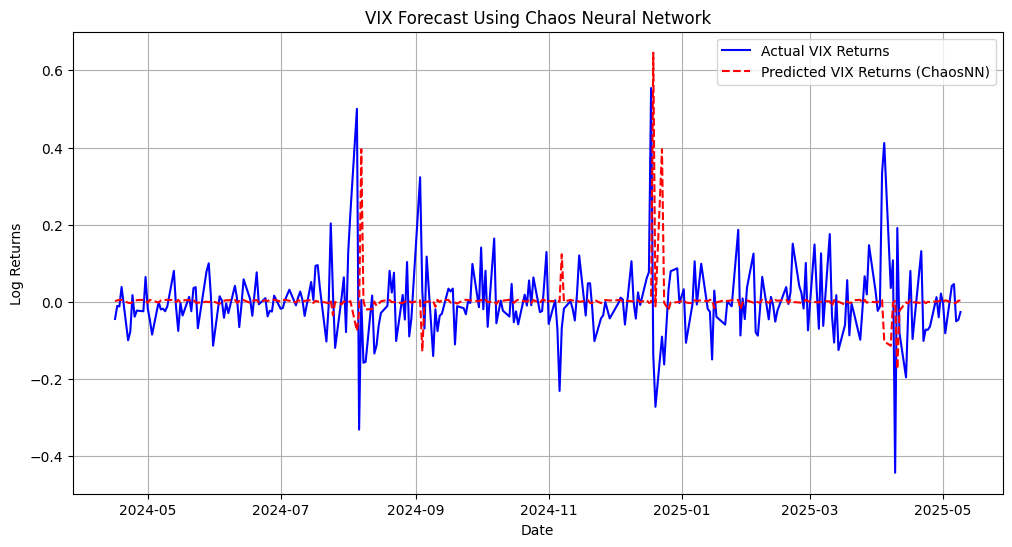

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Fetch VIX data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2020-01-01', end=end_time)

# Extract Close prices and compute log returns
vix_close = vix_data['Close'].dropna()
vix_returns = np.log(vix_close / vix_close.shift(1)).dropna()

# Normalize the data (Standardization)
mean_vix = vix_returns.mean()
std_vix = vix_returns.std()
vix_norm = (vix_returns - mean_vix) / std_vix  # Standardize

# Split data into training and testing
train_size = int(len(vix_norm) * 0.8)
train_data, test_data = vix_norm[:train_size], vix_norm[train_size:]

# Prepare input-output pairs (X = today's return, Y = tomorrow's return)
train_X = torch.tensor(train_data[:-1].values, dtype=torch.float32).reshape(-1, 1)
train_Y = torch.tensor(train_data[1:].values, dtype=torch.float32).reshape(-1, 1)
test_X = torch.tensor(test_data[:-1].values, dtype=torch.float32).reshape(-1, 1)
test_Y = torch.tensor(test_data[1:].values, dtype=torch.float32).reshape(-1, 1)

# Custom Chaotic Activation Function
class ChaoticActivation(nn.Module):
    def forward(self, x):
        return torch.sin(3.1415 * x)  # Chaotic oscillations

# Define Chaos Neural Network
class ChaosNN(nn.Module):
    def __init__(self):
        super(ChaosNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)  # Input to Hidden Layer
        self.chaos = ChaoticActivation()  # Chaotic activation
        self.fc2 = nn.Linear(64, 1)  # Hidden to Output Layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.chaos(x)  # Apply chaotic activation
        x = self.fc2(x)
        return x

# Create model instance
model = ChaosNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the ChaosNN Model
epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(train_X)
    loss = criterion(output, train_Y)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Predict on test data
predicted_torch = model(test_X).detach().numpy()

# Convert back to real scale
predicted_real = (predicted_torch.flatten() * std_vix.iloc[0]) + mean_vix.iloc[0]  # Access the first element of std_vix and mean_vix
test_real = (test_Y.numpy().flatten() * std_vix.iloc[0]) + mean_vix.iloc[0]  # Access the first element of std_vix and mean_vix


# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(vix_returns.index[train_size+1:], test_real, label="Actual VIX Returns", color="blue")
plt.plot(vix_returns.index[train_size+1:], predicted_real, label="Predicted VIX Returns (ChaosNN)", color="red", linestyle="dashed")  # Plot predicted values against correct indices
plt.title("VIX Forecast Using Chaos Neural Network")
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.legend()
plt.grid(True)
plt.show()


# Markov Switching Model combined with CNN

In [ ]:
pip install numpy pandas yfinance torch matplotlib statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 854.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

2025-04-07


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<ipython-input-8-7b7781d06475>:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_return = torch.tensor([vix_norm.iloc[-1]], dtype=torch.float32).reshape(-1, 1)


🔹 Current VIX Value: 45.31
📉 Predicted Next VIX Log Return: -0.116950
📊 Predicted Next VIX Value: 40.31


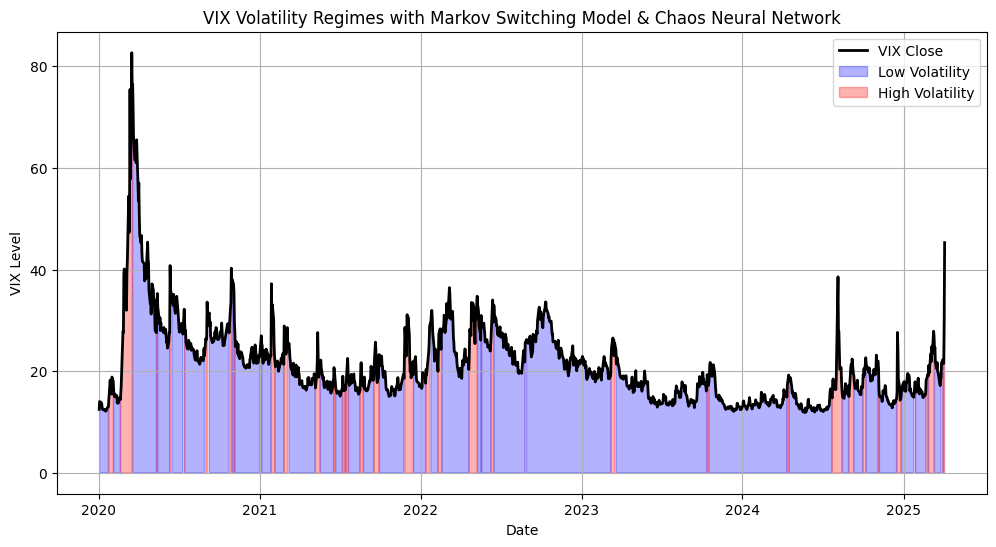

In [ ]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Fetch VIX data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
print(end_time)
vix_data = yf.download('^VIX', start='2020-01-01', end=end_time)

# Extract Close prices and compute log returns
vix_close = vix_data['Close'].dropna()
vix_returns = np.log(vix_close / vix_close.shift(1)).dropna()

# Normalize the data (Standardization)
mean_vix = vix_returns.mean()
std_vix = vix_returns.std()
vix_norm = (vix_returns - mean_vix) / std_vix  # Standardize

# Fit a Markov Switching Model with 2 regimes
msm_model = MarkovRegression(vix_returns, k_regimes=2, trend='c', switching_variance=True)
msm_fit = msm_model.fit()

# Get smoothed regime probabilities
regime_probs = msm_fit.smoothed_marginal_probabilities

# Assign regimes based on probability (>50%)
regime_labels = (regime_probs[1] > 0.5).astype(int)  # 1 = High Volatility, 0 = Low Volatility

# Split data by regimes
low_volatility = vix_norm[regime_labels == 0]
high_volatility = vix_norm[regime_labels == 1]

# Custom Chaotic Activation Function
class ChaoticActivation(nn.Module):
    def forward(self, x):
        return torch.sin(3.1415 * x)  # Chaotic oscillations

# Define Chaos Neural Network
class ChaosNN(nn.Module):
    def __init__(self):
        super(ChaosNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)  # Input to Hidden Layer
        self.chaos = ChaoticActivation()  # Chaotic activation
        self.fc2 = nn.Linear(64, 1)  # Hidden to Output Layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.chaos(x)  # Apply chaotic activation
        x = self.fc2(x)
        return x

# Function to train a ChaosNN model
def train_chaos_nn(data, epochs=200):
    model = ChaosNN()
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Prepare data
    train_X = torch.tensor(data[:-1].values, dtype=torch.float32).reshape(-1, 1)
    train_Y = torch.tensor(data[1:].values, dtype=torch.float32).reshape(-1, 1)

    # Train model
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(train_X)
        loss = criterion(output, train_Y)
        loss.backward()
        optimizer.step()

    return model

# Train separate ChaosNNs for each regime
low_vol_model = train_chaos_nn(low_volatility)
high_vol_model = train_chaos_nn(high_volatility)

# Predict the probability of being in each regime
latest_prob = msm_fit.smoothed_marginal_probabilities.iloc[-1]
predicted_regime = 0 if latest_prob[0] > latest_prob[1] else 1  # Choose the most likely regime

# Choose the corresponding ChaosNN model
model = low_vol_model if predicted_regime == 0 else high_vol_model

# ✅ Fix 1: Use `.iloc[-1]` explicitly to avoid FutureWarning
last_return = torch.tensor([vix_norm.iloc[-1]], dtype=torch.float32).reshape(-1, 1)

# Predict next VIX return
predicted_next = model(last_return).detach().numpy().flatten()[0]

# Convert back to real scale
predicted_next_real = (predicted_next * std_vix) + mean_vix
predicted_next_real = predicted_next_real.item()  # Convert Series to float

# Convert log return to percentage change
predicted_percentage_change = math.exp(predicted_next_real) - 1

# Convert `vix_close.iloc[-1]` to a scalar
current_vix = vix_close.iloc[-1].item()  # Ensure it's a float
predicted_next_vix = current_vix * (1 + predicted_percentage_change)

# Print results
print(f"🔹 Current VIX Value: {current_vix:.2f}")
print(f"📉 Predicted Next VIX Log Return: {predicted_next_real:.6f}")
print(f"📊 Predicted Next VIX Value: {predicted_next_vix:.2f}")


# Convert regime probabilities to NumPy arrays
regime_0_prob = regime_probs[0].to_numpy().flatten()
regime_1_prob = regime_probs[1].to_numpy().flatten()

# Plot VIX Data with Regimes
plt.figure(figsize=(12, 6))
plt.plot(vix_close.index, vix_close.values.flatten(), label="VIX Close", color="black", linewidth=2)  # Use .values to get numpy array

# Align regime probabilities with vix_close index
regime_0_prob_aligned = np.insert(regime_0_prob, 0, np.nan)
regime_1_prob_aligned = np.insert(regime_1_prob, 0, np.nan)

# Overlay Regimes with Corrected Data Types
plt.fill_between(vix_close.index, vix_close.values.flatten(), where=(regime_0_prob_aligned > 0.5), color="blue", alpha=0.3, label="Low Volatility")
plt.fill_between(vix_close.index, vix_close.values.flatten(), where=(regime_1_prob_aligned > 0.5), color="red", alpha=0.3, label="High Volatility")

# Labels and Legend
plt.title("VIX Volatility Regimes with Markov Switching Model & Chaos Neural Network")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend()
plt.grid(True)
plt.show()


# Comparison of Realized vs. Forecasted Volatility

In [ ]:
!pip install numpy --upgrade
!pip install numpyro --upgrade
!pip install statsmodels --upgrade # Add this line to update statsmodels
!pip install arch
import numpy as np
import pandas as pd
import statsmodels.api as sm
from arch import arch_model
import matplotlib.pyplot as plt
import yfinance as yf

# Load historical data (VIX and S&P 500)
vix_data = yf.download("^VIX", start="2000-01-01", end="2024-01-01")['Close']
sp500_data = yf.download("^GSPC", start="2000-01-01", end="2024-01-01")['Close']

# Compute daily returns
sp500_returns = sp500_data.pct_change().dropna()

# Fix GARCH warning: Scale up returns to improve parameter estimation
sp500_returns_scaled = sp500_returns * 100

# Compute realized volatility (20-day rolling standard deviation of returns)
realized_vol = (sp500_returns.rolling(window=20).std() * np.sqrt(252)).shift(1)

# Compute volatility forecasts (lagged correctly)
sma_vol = (sp500_returns.rolling(window=20).std() * np.sqrt(252)).shift(1)
ewma_vol = (sp500_returns.ewm(span=20).std() * np.sqrt(252)).shift(1)

# GARCH(1,1) model estimation with scaled returns
garch_model = arch_model(sp500_returns_scaled, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp="off")

# Extract GARCH volatility forecast and shift it for alignment
garch_vol = pd.Series(garch_fit.conditional_volatility, index=sp500_returns.index) / 100  # Rescale back
garch_vol = garch_vol.shift(1)

# **Rescale GARCH & EWMA to match VIX scale**
garch_vol *= 10
ewma_vol *= 10

# **Apply log transformation and ensure all data is 1D**
df = pd.DataFrame({
    'Realized_Vol': np.log1p(realized_vol).squeeze(),
    'VIX': np.log1p(vix_data.shift(1)).squeeze(),  # Lagged VIX
    'SMA': np.log1p(sma_vol).squeeze(),
    'EWMA': np.log1p(ewma_vol).squeeze(),
    'GARCH': np.log1p(garch_vol).squeeze()
}).dropna()

# Regression: Testing forecasting power of VIX and other models
X = df[['VIX', 'SMA', 'EWMA', 'GARCH']]
X = sm.add_constant(X)  # Add constant term
y = df['Realized_Vol']

model = sm.OLS(y, X).fit()
print(model.summary())

# Value-at-Risk (VaR) calculation (95% confidence)
var_95 = -sp500_returns.rolling(252).quantile(0.05)

# Compare VIX-based VaR vs. other models
df['VaR_VIX'] = -df['VIX'] * 1.645 / np.sqrt(252)
df['VaR_GARCH'] = -df['GARCH'] * 1.645 / np.sqrt(252)
df['VaR_EWMA'] = -df['EWMA'] * 1.645 / np.sqrt(252)

# **Plot Realized vs. Forecasted Volatility**
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Realized_Vol'], label="Realized Volatility", color='black', linewidth=2)
plt.plot(df.index, df['VIX'], label="VIX Forecast", color='blue', alpha=0.7)
plt.plot(df.index, df['GARCH'], label="GARCH Forecast", color='red', alpha=0.7)
plt.plot(df.index, df['EWMA'], label="EWMA Forecast", color='green', alpha=0.7)
plt.legend()
plt.title("Comparison of Realized vs. Forecasted Volatility (Fixed Scaling)")
plt.show()


  Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.3 which is incompatible.
langchain 0.3.19 requires numpy<2,>=1.26.4; python_version < "3.12", but you have numpy 2.2.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.3 which is incompatible.
pytensor 2.27.1 requires numpy<2,>=1.17.0, but you have numpy 2.2.3 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.

ImportError: cannot import name 'intp' from 'numpy._core' (/usr/local/lib/python3.11/dist-packages/numpy/_core/__init__.py)

# Long Short-Term Memory (LSTM) Neural Networks

[*********************100%***********************]  1 of 1 completed


Epoch 0, Loss: 0.162093
Epoch 10, Loss: 0.044890
Epoch 20, Loss: 0.036354
Epoch 30, Loss: 0.030908
Epoch 40, Loss: 0.029280


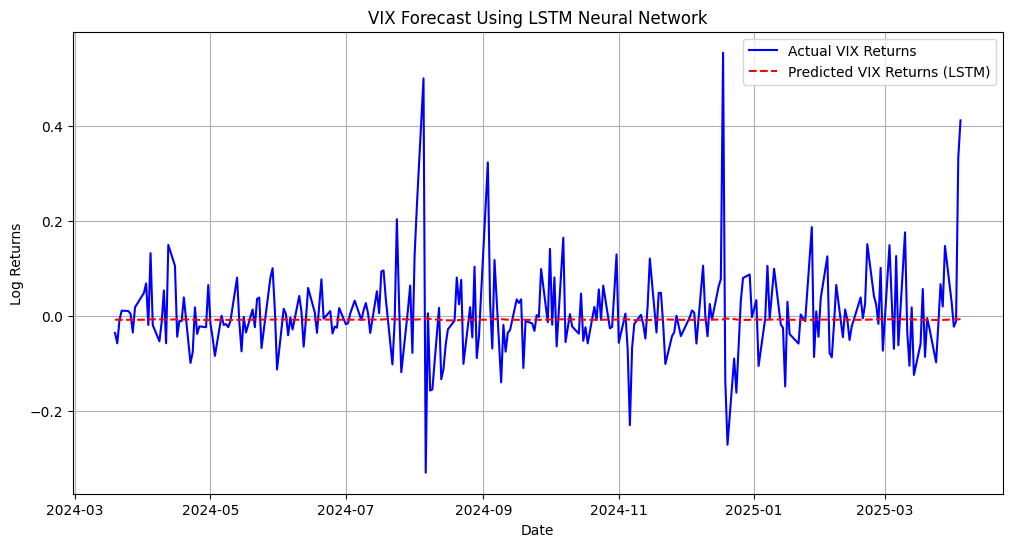

📊 Predicted Next VIX Log Return: -0.005442
🟢 If log return is negative → VIX might drop tomorrow.
🔴 If log return is positive → VIX might rise tomorrow.


In [ ]:
!pip install numpy pandas yfinance torch matplotlib scikit-learn
import numpy as np
import pandas as pd
import yfinance as yf
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ✅ Fetch VIX Data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2020-01-01', end=end_time)

# ✅ Extract Close Prices and Compute Log Returns
vix_close = vix_data['Close'].dropna()
vix_returns = np.log(vix_close / vix_close.shift(1)).dropna()

# ✅ Normalize Data (Scaling between 0 and 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
vix_scaled = scaler.fit_transform(vix_returns.values.reshape(-1, 1))

# ✅ Convert to PyTorch Tensors
vix_tensor = torch.tensor(vix_scaled, dtype=torch.float32)

# ✅ Prepare Data for LSTM (Create Sequences)
def create_sequences(data, seq_length=10):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        Y.append(data[i + seq_length])
    return torch.stack(X), torch.stack(Y)

seq_length = 10  # Using past 10 days for prediction
X, Y = create_sequences(vix_tensor, seq_length)

# ✅ Split into Training and Testing
train_size = int(len(X) * 0.8)
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

# ✅ Define LSTM Model
class VIX_LSTM(nn.Module):
    def __init__(self):
        super(VIX_LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=2, batch_first=True)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])  # Get last time step output
        return x

# ✅ Initialize Model, Loss, Optimizer
model = VIX_LSTM()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ✅ Train LSTM Model
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, Y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# ✅ Predict on Test Data
with torch.no_grad():
    predictions = model(X_test).numpy()

# ✅ Convert Predictions Back to Original Scale
predicted_real = scaler.inverse_transform(predictions)
actual_real = scaler.inverse_transform(Y_test.numpy())

# ✅ Plot Results
plt.figure(figsize=(12, 6))
plt.plot(vix_returns.index[train_size+seq_length:], actual_real, label="Actual VIX Returns", color="blue")
plt.plot(vix_returns.index[train_size+seq_length:], predicted_real, label="Predicted VIX Returns (LSTM)", color="red", linestyle="dashed")
plt.title("VIX Forecast Using LSTM Neural Network")
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Predict Next VIX Log Return
last_seq = vix_tensor[-seq_length:].reshape(1, seq_length, 1)
predicted_next = model(last_seq).item()

# ✅ Convert Prediction to Real Scale
predicted_next_real = scaler.inverse_transform([[predicted_next]])[0][0]

print(f"📊 Predicted Next VIX Log Return: {predicted_next_real:.6f}")
print(f"🟢 If log return is negative → VIX might drop tomorrow.")
print(f"🔴 If log return is positive → VIX might rise tomorrow.")

# Bayesian Change Point Detection on VIX

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.3 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


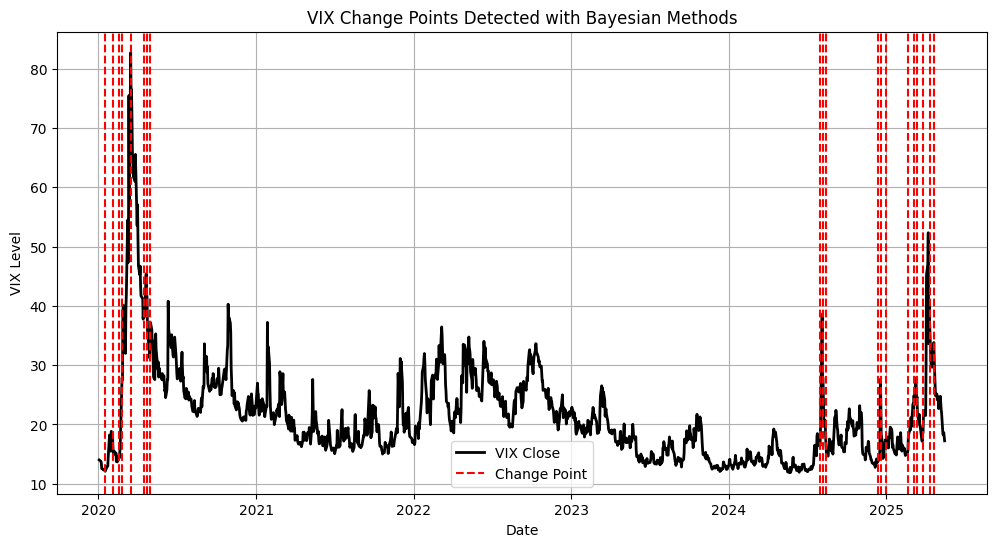

📊 Detected Change Points in VIX:
DatetimeIndex(['2020-01-17', '2020-02-03', '2020-02-18', '2020-02-25',
               '2020-03-17', '2020-04-15', '2020-04-22', '2020-04-29',
               '2024-07-31', '2024-08-07', '2024-08-14', '2024-12-13',
               '2024-12-20', '2024-12-30', '2025-02-21', '2025-03-07',
               '2025-03-14', '2025-03-28', '2025-04-11', '2025-04-21'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [ ]:
!pip install numpy pandas yfinance matplotlib ruptures
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import ruptures as rpt  # Change Point Detection Library

# ✅ Fetch VIX Data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2020-01-01', end=end_time)

# ✅ Extract Close Prices and Compute Log Returns
vix_close = vix_data['Close'].dropna()
vix_returns = np.log(vix_close / vix_close.shift(1)).dropna()

# ✅ Ensure VIX Close aligns with VIX Returns
vix_close = vix_close.loc[vix_returns.index]

# ✅ Apply Bayesian Change Point Detection
algo = rpt.Binseg(model="l2").fit(vix_returns.values)
change_points = algo.predict(n_bkps=20)  # Detect 3 breakpoints

# ✅ Plot Detected Change Points
plt.figure(figsize=(12, 6))
plt.plot(vix_close.index, vix_close, label="VIX Close", color="black", linewidth=2)

# ✅ Mark detected change points
for cp in change_points[:-1]:  # Exclude last point (dataset end)
    plt.axvline(x=vix_close.index[cp], color="red", linestyle="dashed", label="Change Point" if cp == change_points[0] else "")

# ✅ Labels and Legend
plt.title("VIX Change Points Detected with Bayesian Methods")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Print Change Points
change_dates = vix_close.index[change_points[:-1]]  # Convert indices to dates
print(f"📊 Detected Change Points in VIX:\n{change_dates}")


#  AR(p), HAR, and ARFI models using Python and statsmodels, arch (for GARCH models), and fracdiff (for fractional differencing).

In [ ]:
!pip install numpy scipy statsmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm
import arch
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Fetch VIX data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2022-07-02', end=end_time)

# Extract Close prices
vix_close = vix_data['Close']

# Create DataFrame
data = pd.DataFrame(index=vix_close.index)
data['vix'] = vix_close

# Create features
# Lagged VIX values
for lag in [1, 5, 10, 20]:
    data[f'vix_lag_{lag}'] = data['vix'].shift(lag)

# Leverage effect (absolute value of lagged changes in VIX)
data['leverage'] = np.sign(np.random.normal(0, 1, len(data))) * data['vix'].shift(1)

# Day-of-week effects
data['day_of_week'] = data.index.dayofweek

# Macroeconomic announcement days (random selection for example)
data['macro_announcement'] = np.random.choice([0, 1], size=len(data), p=[0.9, 0.1])

# Drop NaN values
data.dropna(inplace=True)

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit AR model
ar_model = sm.tsa.AutoReg(train['vix'], lags=22, trend='c').fit()

# Instead of predicting outside the training data range, predict within the test data range
# and use dynamic forecasting for better performance.
# 'start' and 'end' should be within the training data index range.
# Here, we use the index of the test data, but ensure they are within the training data index.

# Get the overlapping dates between the training and test data
overlapping_dates = train.index.intersection(test.index)

# If there are overlapping dates, use them for prediction
if not overlapping_dates.empty:
    data['ar_forecast'] = ar_model.predict(
        start=overlapping_dates[0],
        end=overlapping_dates[-1],
        dynamic=True
    )
else:
    # If no overlapping dates, handle the case appropriately (e.g., raise an error or use a different approach)
    print("Warning: No overlapping dates between training and test data. AR forecasting may not be accurate.")
    data['ar_forecast'] = np.nan  # Or handle it differently based on your needs


# Fit HAR model
X_har = train[['vix_lag_1', 'vix_lag_5', 'vix_lag_10']]
y_har = train['vix']
X_har = sm.add_constant(X_har)
har_model = sm.OLS(y_har, X_har).fit()

test_X_har = test[['vix_lag_1', 'vix_lag_5', 'vix_lag_10']]
test_X_har = sm.add_constant(test_X_har)
data.loc[test.index, 'har_forecast'] = har_model.predict(test_X_har)

# Replace ARFI with simple differencing (as fracdiff is unavailable)
data['arfi_forecast'] = data['vix'].diff().fillna(0)

# GARCH Model
garch = arch_model(train['vix'], vol='Garch', p=1, q=1).fit()
data.loc[test.index, 'garch_forecast'] = garch.forecast(start=test.index[0], horizon=1).variance

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['vix'], label='Actual VIX', color='black')
plt.plot(test.index, data.loc[test.index, 'ar_forecast'], label='AR(22) Forecast', linestyle='--')
plt.plot(test.index, data.loc[test.index, 'har_forecast'], label='HAR Forecast', linestyle='-.')
plt.plot(test.index, data.loc[test.index, 'arfi_forecast'], label='ARFI (Simple Diff) Forecast', linestyle=':')
plt.plot(test.index, data.loc[test.index, 'garch_forecast'], label='GARCH(1,1) Forecast', linestyle='--')
plt.legend()
plt.title("VIX Forecasting Models")
plt.show()

ModuleNotFoundError: No module named 'arch'

# VIXL.L

[*********************100%***********************]  1 of 1 completed


VIX Monthly Decline Rate: 0.84 points per month


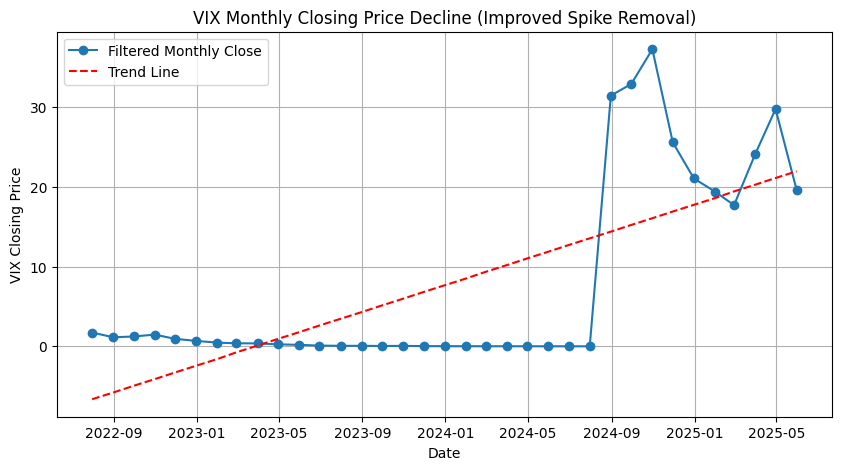

In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Fetch VIX data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('VIXL.L', start='2022-07-02', end=end_time)

# Extract Close prices
vix_close = vix_data['Close']

# 1️⃣ **Detect and Remove Spikes Using IQR Method**
Q1 = vix_close.quantile(0.25)
Q3 = vix_close.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (1.5x IQR range)
filtered_vix = vix_close[(vix_close > (Q1 - 1.5 * IQR)) & (vix_close < (Q3 + 1.5 * IQR))]

# 2️⃣ **Additional Filtering: Rolling Median & STD**
rolling_median = filtered_vix.rolling(window=10, min_periods=1).median()
rolling_std = filtered_vix.rolling(window=10, min_periods=1).std()

# Remove data points that deviate significantly from the rolling median
filtered_vix = filtered_vix[(filtered_vix > (rolling_median - 2 * rolling_std)) &
                            (filtered_vix < (rolling_median + 2 * rolling_std))]
monthly_close = filtered_vix.groupby(pd.Grouper(freq='ME')).mean() #🎯 Using groupby instead of resample

# Resample Monthly and Compute Mean Close Prices
monthly_close = monthly_close.dropna()  # Remove rows with NaN values


# Compute Monthly Trend (Linear Regression)
months = np.arange(len(monthly_close))
if len(monthly_close) > 1:  # 🎯 Check if enough data points for regression
    slope, intercept, r_value, p_value, std_err = linregress(months, monthly_close['VIXL.L'].values)
else:
    slope, intercept = np.nan, np.nan  # Handle cases with insufficient data

# Calculate Monthly Drop Rate
monthly_drop_rate = slope
print(f"VIX Monthly Decline Rate: {monthly_drop_rate:.2f} points per month")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_close.index, monthly_close, label="Filtered Monthly Close", marker='o')
plt.plot(monthly_close.index, intercept + slope * months, label="Trend Line", linestyle="dashed", color='red')
plt.xlabel("Date")
plt.ylabel("VIX Closing Price")
plt.title("VIX Monthly Closing Price Decline (Improved Spike Removal)")
plt.legend()
plt.grid()
plt.show()


# Tests

Created and .xlsx file which contains VIX prices with google finance method: https://support.google.com/docs/answer/3093281?hl=en-GB and hosted it on GitHub to use it as an alternative when yfinance is down.

In [ ]:
pip install pandas openpyxl matplotlib seaborn requests

Successfully read the Excel file.
Available sheets: dict_keys(['Sheet1'])
                     Date  Close
0 2024-01-02 15:15:59.904  13.20
1 2024-01-03 15:15:59.904  14.04
2 2024-01-04 15:15:59.904  14.13
3 2024-01-05 15:15:59.904  13.35
4 2024-01-08 15:15:59.904  13.08


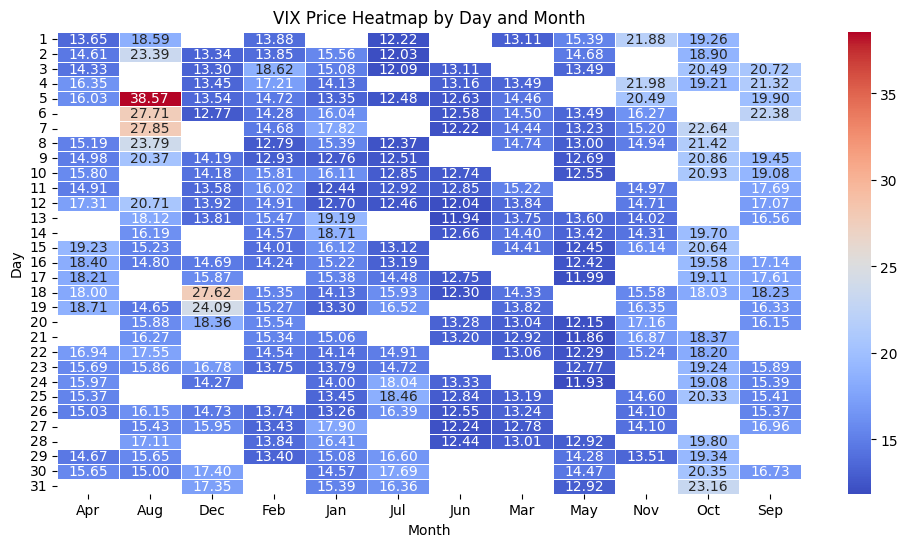

In [ ]:
import pandas as pd
import requests
from io import BytesIO
import seaborn as sns # import seaborn
import matplotlib.pyplot as plt # import pyplot

# GitHub raw file URL (replace with the actual link to your .xlsx file)
github_url = "https://github.com/stefanciprian/rd/blob/main/assets/VIX.xlsx"

# Modified URL to access the raw content
raw_github_url = github_url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")

# Fetch the content from GitHub
response = requests.get(raw_github_url)
if response.status_code == 200:
    excel_data = BytesIO(response.content)

    # Read the Excel file, explicitly specifying the engine
    df = pd.read_excel(excel_data, sheet_name=None, engine='openpyxl')  # Reads all sheets into a dictionary of DataFrames
    print("Successfully read the Excel file.")

    # Print available sheet names
    print("Available sheets:", df.keys())

    # Display the first few rows of the first sheet
    first_sheet = list(df.keys())[0]
    print(df[first_sheet].head())

    # Access the first sheet's DataFrame (replace 'Sheet1' with the actual sheet name if different)
    first_sheet_df = df[first_sheet]

    # Convert Date to datetime within the first sheet's DataFrame
    first_sheet_df["Date"] = pd.to_datetime(first_sheet_df["Date"])

    # Extract month and day for the heatmap
    first_sheet_df["Month"] = first_sheet_df["Date"].dt.strftime("%b")  # Month abbreviation
    first_sheet_df["Day"] = first_sheet_df["Date"].dt.day

    # Create pivot table for heatmap
    pivot_table = first_sheet_df.pivot_table(index="Day", columns="Month", values="Close")

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
    plt.title("VIX Price Heatmap by Day and Month")
    plt.xlabel("Month")
    plt.ylabel("Day")
    plt.show()
else:
    print("Failed to download the file. Status code:", response.status_code)

[*********************100%***********************]  1 of 1 completed


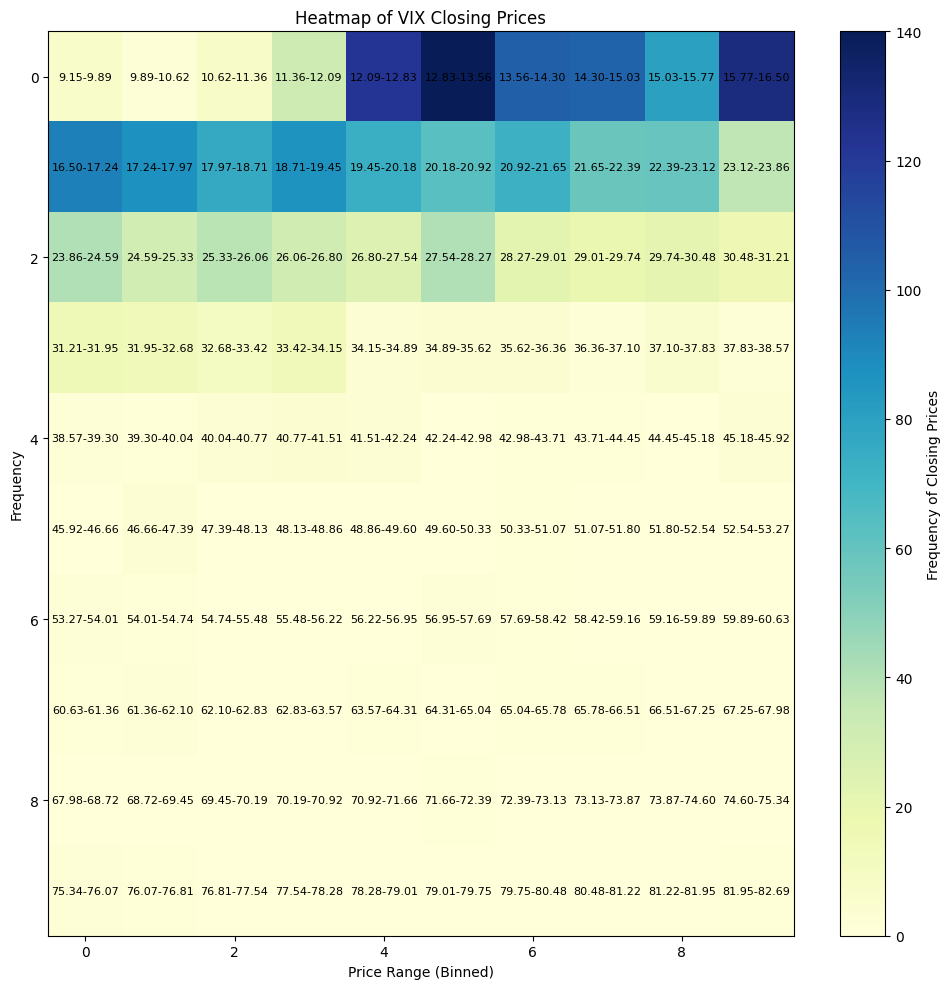

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

# Define date range
end_time = dt.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2018-01-01', end=end_time)

# Extract the last 100 closing prices
close_prices = vix_data['Close'].values

# Define dynamic number of bins based on data range
num_bins = min(100, len(np.unique(close_prices)))  # Ensures useful binning
counts, bin_edges = np.histogram(close_prices, bins=num_bins)

# Adjust grid size to better fit the number of bins
grid_rows = int(np.ceil(np.sqrt(num_bins)))
grid_cols = int(np.ceil(num_bins / grid_rows))

# Ensure reshaping works correctly by padding counts if needed
padded_counts = np.pad(counts, (0, grid_rows * grid_cols - num_bins), mode='constant')

# Reshape into a 2D grid
heatmap_data = padded_counts.reshape(grid_rows, grid_cols)

# Create the heatmap
plt.figure(figsize=(grid_cols, grid_rows))
plt.imshow(heatmap_data, cmap='YlGnBu', aspect='auto')

# Add colorbar
plt.colorbar(label='Frequency of Closing Prices')

# Set labels
plt.title('Heatmap of VIX Closing Prices')
plt.xlabel('Price Range (Binned)')
plt.ylabel('Frequency')

# Overlay bin labels
for i in range(grid_rows):
    for j in range(grid_cols):
        index = i * grid_cols + j
        if index < num_bins:
            bin_label = f"{bin_edges[index]:.2f}-{bin_edges[index+1]:.2f}"
            plt.text(j, i, bin_label, ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed


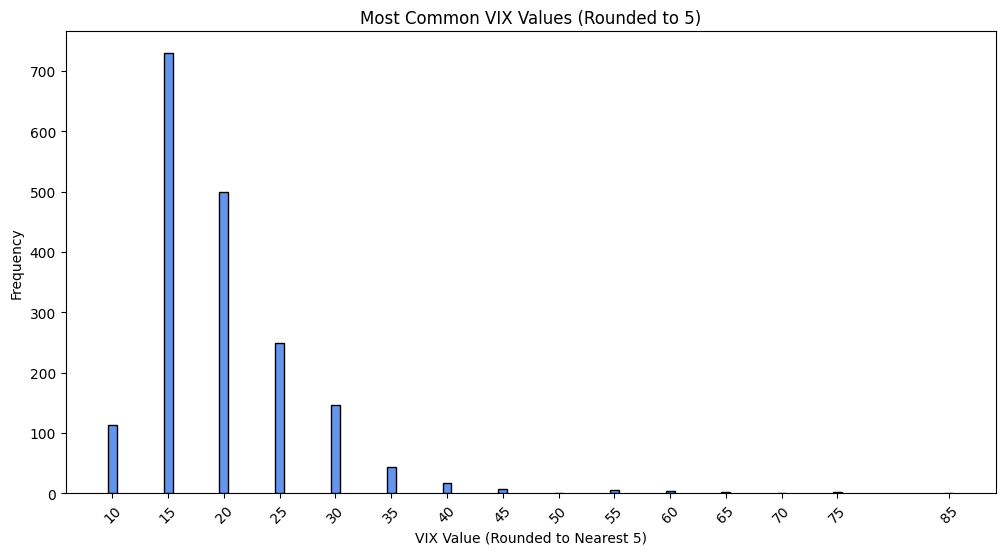

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
from collections import Counter

# Define date range
end_time = dt.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2018-01-01', end=end_time)

# Extract closing prices
close_prices = vix_data['Close'].dropna().values  # Drop NaN values for safety

# Round closing prices to the nearest multiple of 5
rounded_prices = np.round(close_prices / 5) * 5

# ✅ Fix: Ensure `rounded_prices` is a 1D list
price_counts = Counter(rounded_prices.flatten().tolist())

# Sort by price for better visualization
sorted_prices = sorted(price_counts.keys())
sorted_counts = [price_counts[p] for p in sorted_prices]

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_prices, sorted_counts, color='cornflowerblue', edgecolor='black')

# Add labels
plt.xlabel('VIX Value (Rounded to Nearest 5)')
plt.ylabel('Frequency')
plt.title('Most Common VIX Values (Rounded to 5)')
plt.xticks(sorted_prices, rotation=45)

# Show plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#import ipywidgets as widgets
from IPython.display import display

# Base S&P 500 value and VIX relationship assumption
BASE_SPX = 5179  # Adjust to the current S&P 500 value
VIX_BASE = 39    # Base VIX level at which SPX is at BASE_SPX
CORRELATION = -0.79  # Average correlation over time

def calculate_spx(vix):
    """
    Estimates the S&P 500 value given a VIX level based on historical correlation.
    Uses an inverse exponential decay model.
    """
    vix_change = (vix - VIX_BASE) / VIX_BASE  # % change from base VIX
    spx_multiplier = np.exp(CORRELATION * vix_change)  # Exponential decay factor
    return BASE_SPX * spx_multiplier

def update_plot(vix):
    spx_value = calculate_spx(vix)
    plt.figure(figsize=(6, 4))
    plt.bar(["S&P 500"], [spx_value], color="blue")
    plt.ylim(0, BASE_SPX * 1.2)
    plt.title(f"S&P 500 Estimated Value (VIX: {vix})")
    plt.ylabel("S&P 500 Index")
    plt.show()

# Create a slider for VIX values
#vix_slider = widgets.FloatSlider(value=39, min=10, max=85, step=0.5, description="VIX:")

# Link slider to update function
#widgets.interactive(update_plot, vix=vix_slider)


[[31.75, 5], [21.9075, 20], [15.116174999999998, 80]]
Current value:  1587.198375
Total Costs:  1806.194
Total positions:  105
Average price:  17.20184761904762


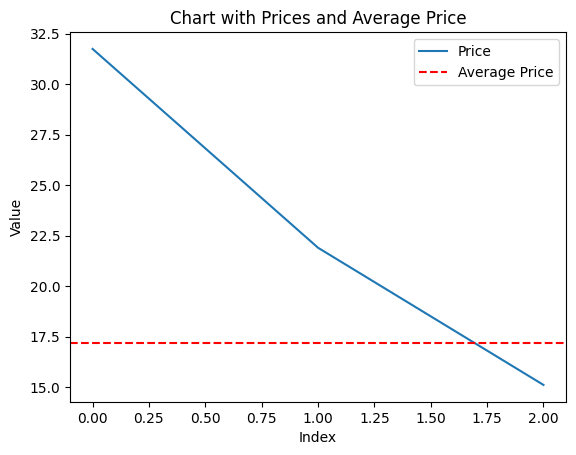

Price increase 1fold:  15.116174999999998  (Breakeven) 2.085672619047621
Price increase 2fold:  30.232349999999997  Worth:  3174.39675
Price increase 3fold:  45.348524999999995  Worth:  4761.595125
Price increase 4fold:  60.46469999999999  Worth:  6348.7935
Price increase 5fold:  75.58087499999999  Worth:  7935.991875


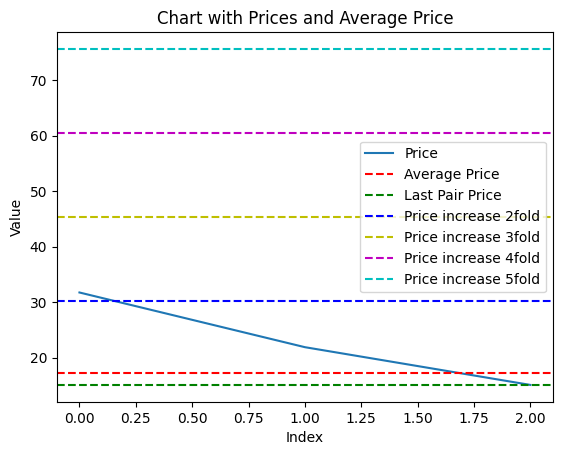

In [ ]:
import matplotlib.pyplot as plt

decay = 0.69
multiple = 4
n = 3
pr = 31.75
pos = 5

def generate_pairs(n):
  pairs = []
  for i in range(n):
      if i == 0:
        pairs.append([pr, pos])
      else:
        first = pairs[i-1][0] * decay
        second = pairs[i-1][1] * multiple
        pairs.append([first, second])
  return pairs

pairs = generate_pairs(n)
print(pairs)

def recursive_with_reduction(pairs, index=0, accumulated=0):
  if index == len(pairs):
    return accumulated
  current_value = pairs[index][0] * pairs[index][1]

  # Check if this is the last iteration
  if index == len(pairs) -1:
    accumulated = accumulated + current_value
  else:
    accumulated = (accumulated + current_value) * decay

  return recursive_with_reduction(pairs, index +1, accumulated)

# Calculate result
result = recursive_with_reduction(pairs)
print("Current value: ", result)

print("Total Costs: ", sum([pair[0] * pair[1] for pair in pairs]))

total_positions = sum([pair[1] for pair in pairs])
print("Total positions: ", total_positions)

average_price = sum([pair[0] * pair[1] for pair in pairs]) / total_positions if total_positions != 0 else 0
print("Average price: ", average_price)

# Plot the chart with prices and average price
plt.plot([pair[0] for pair in pairs], label='Price')
plt.axhline(y=average_price, color='r', linestyle='--', label='Average Price')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Chart with Prices and Average Price')
plt.legend()
plt.show()

# How much the price has to go up in order to breakeven
# and how much the entire positions will be worth if the price increases 2folds, 3folds, 4folds, 5 folds
price_increase_2fold = 2
price_increase_3fold = 3
price_increase_4fold = 4
price_increase_5fold = 5
last_pair_price = pairs[-1][0]

print("Price increase 1fold: ", last_pair_price, " (Breakeven)", average_price - last_pair_price)
print("Price increase 2fold: ", last_pair_price * price_increase_2fold, " Worth: ", total_positions * last_pair_price * price_increase_2fold)
print("Price increase 3fold: ", last_pair_price * price_increase_3fold, " Worth: ", total_positions * last_pair_price * price_increase_3fold)
print("Price increase 4fold: ", last_pair_price * price_increase_4fold, " Worth: ", total_positions * last_pair_price * price_increase_4fold)
print("Price increase 5fold: ", last_pair_price * price_increase_5fold, " Worth: ", total_positions * last_pair_price * price_increase_5fold)

# Plot the prce increase needed to breakeven and the prices mutiplied bt 2 fold, 3 fold, 4 fold, 5 fold
plt.plot([pair[0] for pair in pairs], label='Price')
plt.axhline(y=average_price, color='r', linestyle='--', label='Average Price')
plt.axhline(y=last_pair_price, color='g', linestyle='--', label='Last Pair Price')
plt.axhline(y=last_pair_price * price_increase_2fold, color='b', linestyle='--', label='Price increase 2fold')
plt.axhline(y=last_pair_price * price_increase_3fold, color='y', linestyle='--', label='Price increase 3fold')
plt.axhline(y=last_pair_price * price_increase_4fold, color='m', linestyle='--', label='Price increase 4fold')
plt.axhline(y=last_pair_price * price_increase_5fold, color='c', linestyle='--', label='Price increase 5fold')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Chart with Prices and Average Price')
plt.legend()
plt.show()

